In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#upload the data and store in a variable
data= pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
data.shape              #checking the shape of data

(1470, 35)

In [5]:
#removing employeecount and employee number bcz there is no need of it
data.drop(["EmployeeCount","EmployeeNumber"], axis=1, inplace=True)

In [6]:
data.shape           #checking shape after removing it

(1470, 33)

In [7]:
data.info()             #checking information abouth the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [8]:
data.isnull().sum()       #checking the sum of null values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int

In [9]:
data.duplicated()             #checking duplicate data

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

In [10]:
data.describe()              #checking statistics information

Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.135373   403.509100          8.106864     1.024165   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1470.000000  1470.000000     1470.000000  1470.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.093082    20.329428        0.711561     1.106940   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.750000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome  ...  RelationshipSatisfaction  \
count      1470.000000    1470.000000  ...               1470.000000   
mean          2.728571    6502.931293  ...                  2.712245   
std           1.102846    4707.956783  ...                  1.081209   
min           1.000000    1009.000000  ...                  1.000000   
25%           2.000000    2911.000000  ...                  2.000000   
50%           3.000000    4919.000000  ...                  3.000000   
75%           4.000000    8379.000000  ...                  4.000000   
max           4.000000   19999.000000  ...                  4.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         1470.0       1470.000000        1470.000000   
mean            80.0          0.793878          11.279592   
std              0.0          0.852077           7.780782   
min             80.0          0.000000           0.000000   
25%             80.0          0.000000           6.000000   
50%             80.0          1.000000          10.000000   
75%             80.0          1.000000          15.000000   
max             80.0          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1470.000000      1470.000000     1470.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289271         0.706476        6.126525   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1470.000000              1470.000000           1470.000000  
mean             4.229252                 2.187755              4.123129  
std              3.623137                 3.222430              3.568136  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 24 columns]

In [11]:
data.select_dtypes(include=object).describe().T     #checking categorical feature

count unique                     top  freq
Attrition       1470      2                      No  1233
BusinessTravel  1470      3           Travel_Rarely  1043
Department      1470      3  Research & Development   961
EducationField  1470      6           Life Sciences   606
Gender          1470      2                    Male   882
JobRole         1470      9         Sales Executive   326
MaritalStatus   1470      3                 Married   673
Over18          1470      1                       Y  1470
OverTime        1470      2                      No  1054

In [12]:
#see unique values
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCur

In [13]:
data.columns            #checking column names

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [14]:
data.select_dtypes(exclude=object).columns           #checking numerical column name

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [15]:
#finding categorical column in the dataset
data.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

**Train test split**

In [16]:

#copying original data into another variable
data1=data.copy()

In [17]:
data1.head(2)       #checking first 2rows

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   

   Gender  ...  RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0  Female  ...                         1             80                 0   
1    Male  ...                         4             80                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  

[2 rows x 33 columns]

In [18]:
x=data1.drop(["Attrition"],axis=1)    #extract independent varialbe and store in a variable x
y=data1["Attrition"]       #extract dependent variable and store in a variable y


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=42)      #splitting the data, test size means how much I keep for testing, useing random state so that data did not change when I run the prog many times
#checking the length
len(x_train)  , len(y_train),len(x_test)  , len(y_test)

(1176, 1176, 294, 294)

In [20]:
training_data= pd.concat([x_train, y_train],axis=1)      #concat x trainand y train and adding to a new variable
training_data.head(2)                              #checking first 2 rows

Age BusinessTravel  DailyRate              Department  DistanceFromHome  \
1097   24  Travel_Rarely        350  Research & Development                21   
727    18     Non-Travel        287  Research & Development                 5   

      Education    EducationField  EnvironmentSatisfaction Gender  HourlyRate  \
1097          2  Technical Degree                        3   Male          57   
727           2     Life Sciences                        2   Male          73   

      ...  StandardHours  StockOptionLevel TotalWorkingYears  \
1097  ...             80                 3                 2   
727   ...             80                 0                 0   

      TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
1097                      3               3               1   
727                       2               3               0   

      YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  \
1097                   1                        0                    0   
727                    0                        0                    0   

     Attrition  
1097        No  
727         No  

[2 rows x 33 columns]

In [21]:
test_data= pd.concat([x_test, y_test],axis=1)      #concat x trainand y train and adding to a new variable
test_data.head(2)                              #checking first 2 rows

Age BusinessTravel  DailyRate              Department  DistanceFromHome  \
1041   28  Travel_Rarely        866                   Sales                 5   
184    53  Travel_Rarely       1084  Research & Development                13   

      Education EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
1041          3        Medical                        4    Male          84   
184           2        Medical                        4  Female          57   

      ...  StandardHours  StockOptionLevel TotalWorkingYears  \
1041  ...             80                 0                 6   
184   ...             80                 2                 5   

      TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
1041                      4               3               5   
184                       3               3               4   

      YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  \
1041                   4                        1                    3   
184                    2                        1                    3   

     Attrition  
1041        No  
184         No  

[2 rows x 33 columns]

In [22]:
#checking shape
training_data.shape

(1176, 33)

In [23]:
test_data.shape

(294, 33)

**Exploratory Data Analysis on Train Data**

In [24]:
training_data.head(2)

Age BusinessTravel  DailyRate              Department  DistanceFromHome  \
1097   24  Travel_Rarely        350  Research & Development                21   
727    18     Non-Travel        287  Research & Development                 5   

      Education    EducationField  EnvironmentSatisfaction Gender  HourlyRate  \
1097          2  Technical Degree                        3   Male          57   
727           2     Life Sciences                        2   Male          73   

      ...  StandardHours  StockOptionLevel TotalWorkingYears  \
1097  ...             80                 3                 2   
727   ...             80                 0                 0   

      TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
1097                      3               3               1   
727                       2               3               0   

      YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  \
1097                   1                        0                    0   
727                    0                        0                    0   

     Attrition  
1097        No  
727         No  

[2 rows x 33 columns]

In [25]:
training_data.select_dtypes(exclude='object').columns            #numerical column

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [26]:
training_data.select_dtypes(include='object').columns            #categorical column

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime', 'Attrition'],
      dtype='object')

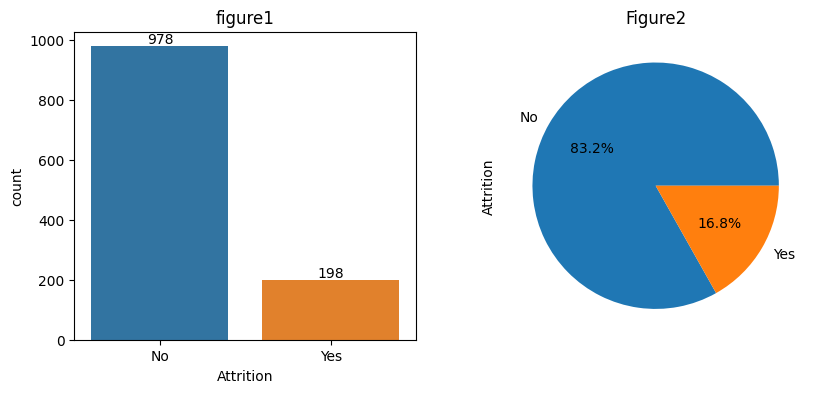

In [27]:
#plot a figure to see how many employees left the company
plt.figure(figsize=(15,4))    #set a figure size

plt.subplot(131)
plt.title("figure1")
ax=sns.countplot(x='Attrition',data=training_data)
for label in ax.containers:
    ax.bar_label(label)

plt.subplot(132)
plt.title("Figure2")
training_data["Attrition"].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

according to training data 16.2% of total employees left the company.

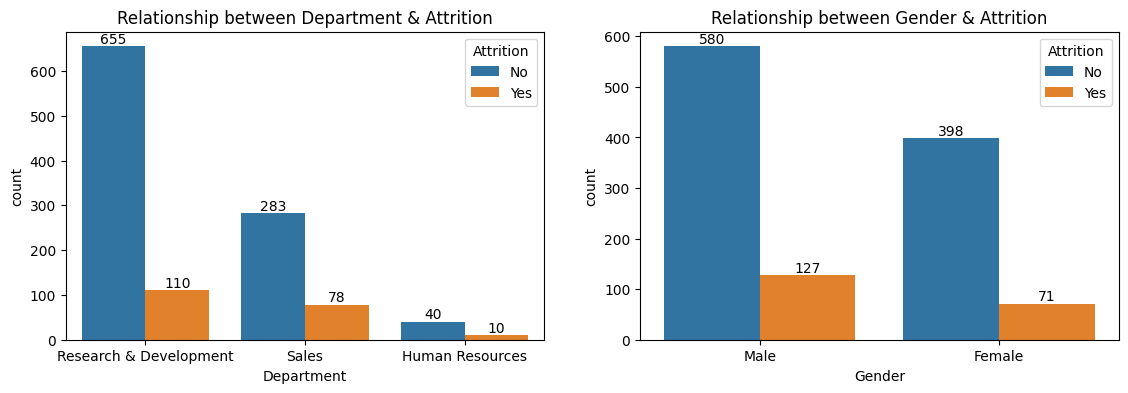

In [28]:
plt.figure(figsize=(21,4))
plt.subplot(1,3,1)
ax= sns.countplot(x='Department',hue='Attrition',data=training_data)
for label in ax.containers:
    ax.bar_label(label)
plt.title("Relationship between Department & Attrition")

plt.subplot(1,3,2)
ax1=sns.countplot(x='Gender',hue='Attrition',data=training_data)
for label in ax1.containers:
    ax1.bar_label(label)
plt.title("Relationship between Gender & Attrition")
plt.show()


According to the figure, 110 employees left the company from the Research & Development department, 78 employees from sales and 40 from resources.

Of the number of employees left, 55% are from Research & Development.

According to 2nd graph number of male employees left the company more as compared to females.

In [29]:
#finding the relationship between gender , department and attrition with the help of groupby function.
Employee_left= pd.DataFrame(training_data.groupby(['Gender','Department'])['Attrition'].value_counts())

In [30]:
Employee_left

Attrition
Gender Department             Attrition           
Female Human Resources        No                10
                              Yes                6
       Research & Development No               266
                              Yes               33
       Sales                  No               122
                              Yes               32
Male   Human Resources        No                30
                              Yes                4
       Research & Development No               389
                              Yes               77
       Sales                  No               161
                              Yes               46

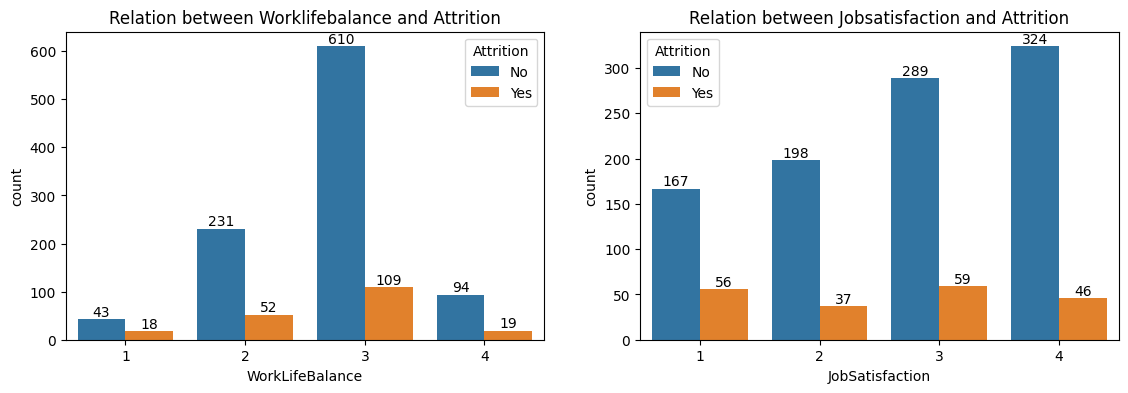

In [31]:
plt.figure(figsize=(21,4))
plt.subplot(1,3,1)
ax= sns.countplot(x='WorkLifeBalance',hue='Attrition',data=training_data)
for label in ax.containers:
    ax.bar_label(label)
plt.title("Relation between Worklifebalance and Attrition")

plt.subplot(1,3,2)
ax1=sns.countplot(x='JobSatisfaction',hue='Attrition',data=training_data)
for label in ax1.containers:
    ax1.bar_label(label)
plt.title("Relation between Jobsatisfaction and Attrition")
plt.show()

1:'Poor', 2:'Neutral', 3:'Good', 4:'Excellent'

According to the graph employees who left more have a good work-life balance and job satisfaction.

After that employees who have a neutral work life balance and poor job satisfaction have left.

In [32]:
#finding the relationship between gender, worklifebalance and attrition
training_data.groupby(['Gender','WorkLifeBalance'])['Attrition'].value_counts()

Gender  WorkLifeBalance  Attrition
Female  1                No            18
                         Yes            3
        2                No            95
                         Yes           17
        3                No           257
                         Yes           41
        4                No            28
                         Yes           10
Male    1                No            25
                         Yes           15
        2                No           136
                         Yes           35
        3                No           353
                         Yes           68
        4                No            66
                         Yes            9
Name: Attrition, dtype: int64

In [33]:
#finding a relationship between gender, jobsatisfaction and attrition
training_data.groupby(['Gender','JobSatisfaction'])['Attrition'].value_counts()


Gender  JobSatisfaction  Attrition
Female  1                No            69
                         Yes           16
        2                No            81
                         Yes           19
        3                No           124
                         Yes           21
        4                No           124
                         Yes           15
Male    1                No            98
                         Yes           40
        2                No           117
                         Yes           18
        3                No           165
                         Yes           38
        4                No           200
                         Yes           31
Name: Attrition, dtype: int64

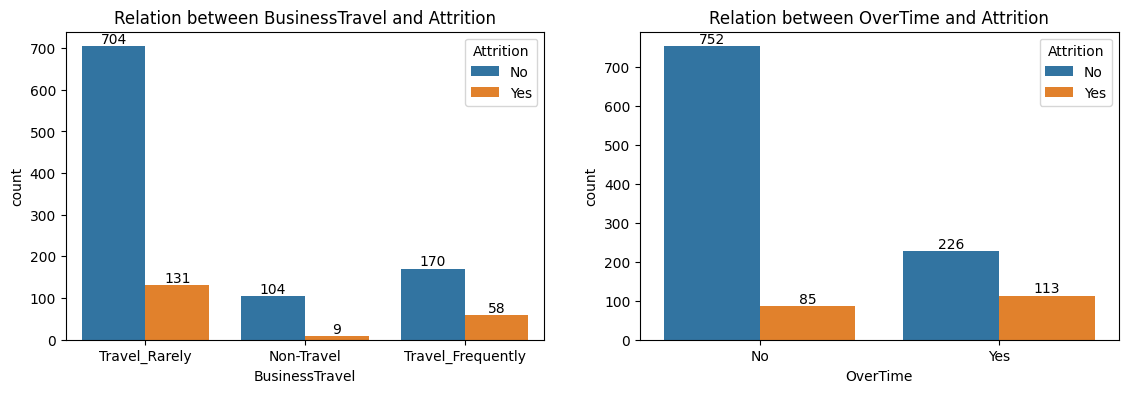

In [34]:
plt.figure(figsize=(21,4))
plt.subplot(1,3,1)
ax= sns.countplot(x='BusinessTravel',hue='Attrition',data=training_data)
for label in ax.containers:
    ax.bar_label(label)
plt.title("Relation between BusinessTravel and Attrition")

plt.subplot(1,3,2)
ax1=sns.countplot(x='OverTime',hue='Attrition',data=training_data)
for label in ax1.containers:
    ax1.bar_label(label)
plt.title("Relation between OverTime and Attrition")
plt.show()

Employees who travel frequently leave more as compared to others.

Employees who did overtime left more as compared to those who didn't.

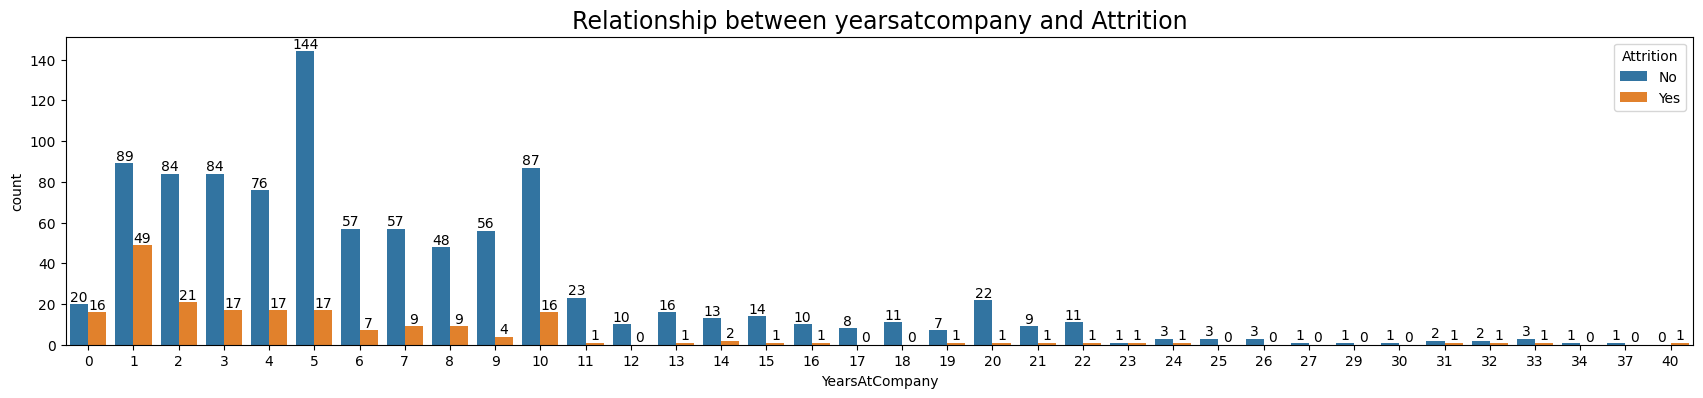

In [35]:
plt.figure(figsize=(21,4))
ax= sns.countplot(x='YearsAtCompany',hue='Attrition',data=training_data)
for label in ax.containers:
    ax.bar_label(label)
plt.title("Relationship between yearsatcompany and Attrition", fontsize=17)
plt.show()

Employees between 0-1 years leave more.

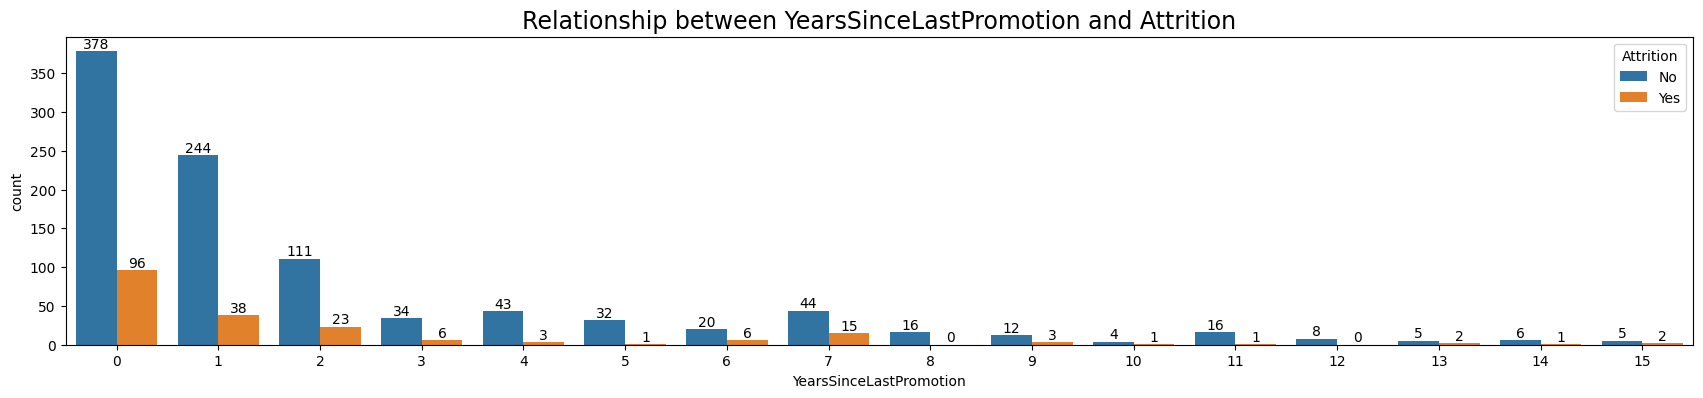

In [36]:
plt.figure(figsize=(21,4))
ax1=sns.countplot(x='YearsSinceLastPromotion',hue='Attrition',data=training_data)
for label in ax1.containers:
    ax1.bar_label(label)
plt.title("Relationship between YearsSinceLastPromotion and Attrition", fontsize=17)
plt.show()

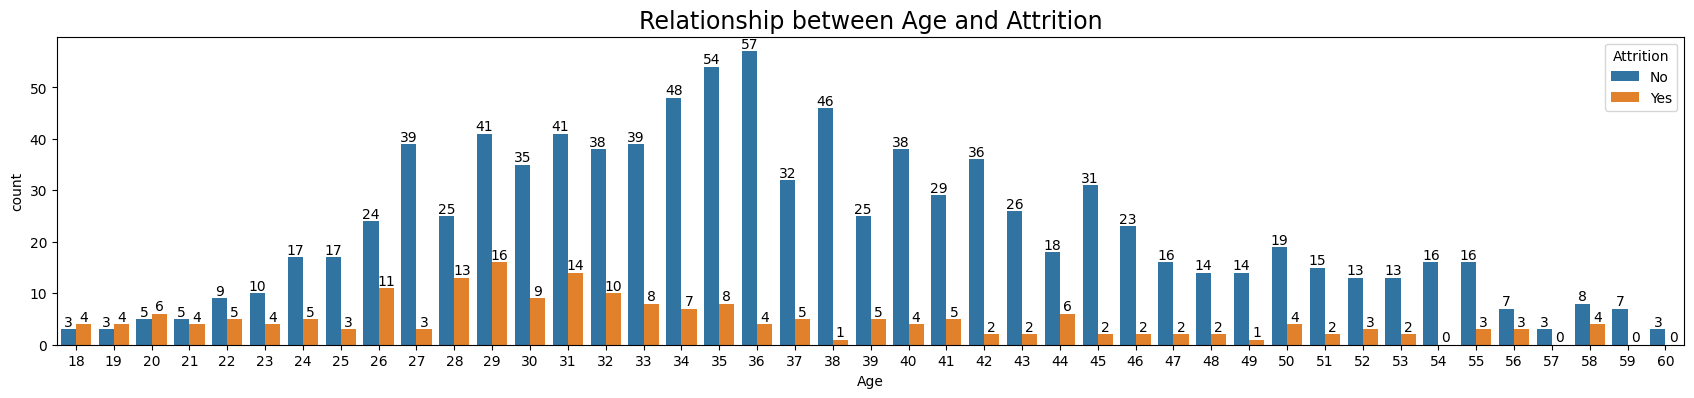

In [37]:
plt.figure(figsize=(21,4))
ax1=sns.countplot(x='Age',hue='Attrition',data=training_data)
for label in ax1.containers:
    ax1.bar_label(label)
plt.title("Relationship between Age and Attrition", fontsize=17)
plt.show()

Employees whose age is between 18-24 leave more, after that age between 28-32 leave.

Text(0.5, 1.0, 'Relationship between MonthlyIncome and Attrition')

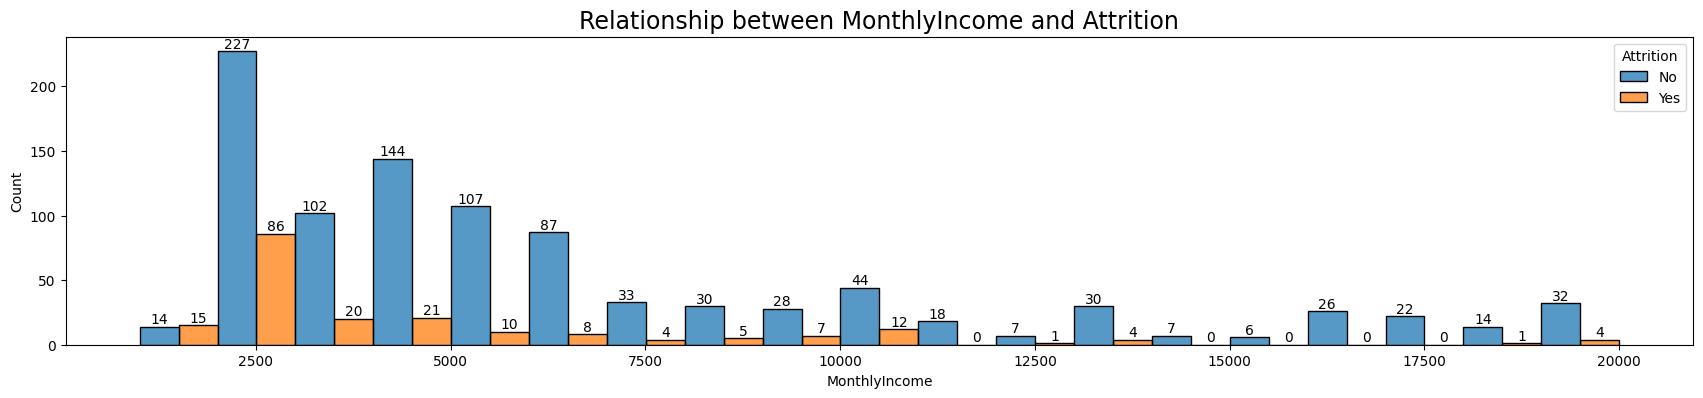

In [38]:
plt.figure(figsize=(21,4))
ax1=sns.histplot(x='MonthlyIncome',hue='Attrition',data=training_data,multiple='dodge')
for label in ax1.containers:
    ax1.bar_label(label)
plt.title("Relationship between MonthlyIncome and Attrition", fontsize=17)

Employees whose salaries under Rs6000 left more.

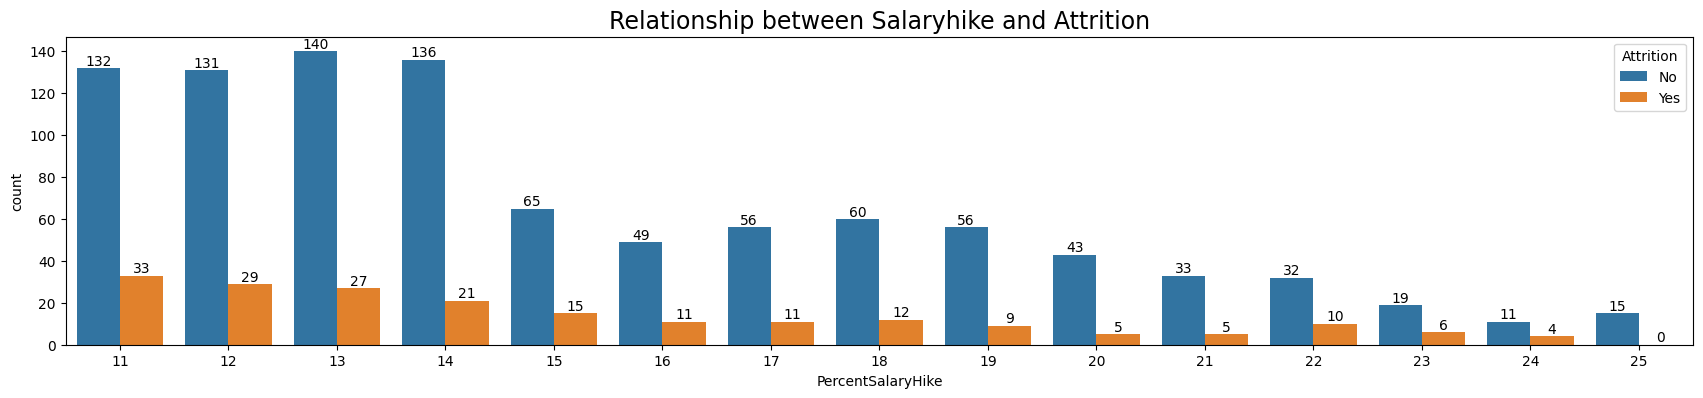

In [39]:
plt.figure(figsize=(21,4))
ax1=sns.countplot(x='PercentSalaryHike',hue='Attrition',data=training_data)
for label in ax1.containers:
    ax1.bar_label(label)
plt.title("Relationship between Salaryhike and Attrition",fontsize=17)
plt.show()

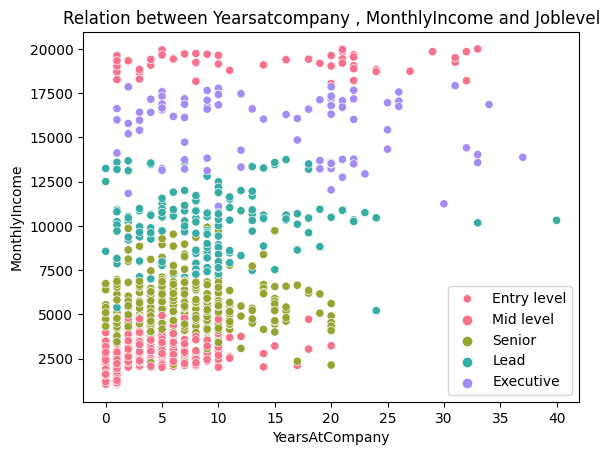

In [40]:
sns.scatterplot(x='YearsAtCompany',y="MonthlyIncome",data=training_data, hue='JobLevel',palette='husl')
plt.legend(labels = ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive'])
plt.title("Relation between Yearsatcompany , MonthlyIncome and Joblevel")
plt.show()

In [41]:
#finding mean monthly income on the basis of deparment and gender
training_data.groupby(['Department','Gender'])["MonthlyIncome"].mean()

Department              Gender
Human Resources         Female    7482.937500
                        Male      5690.705882
Research & Development  Female    6599.234114
                        Male      5862.701717
Sales                   Female    6885.714286
                        Male      6893.946860
Name: MonthlyIncome, dtype: float64

In [42]:
#Mean monthly income on the basis of Deparment and attrition
training_data.groupby(['Department','Attrition'])["MonthlyIncome"].mean()

Department              Attrition
Human Resources         No           6818.525000
                        Yes          4047.000000
Research & Development  No           6522.677863
                        Yes          3934.872727
Sales                   No           7166.123675
                        Yes          5890.179487
Name: MonthlyIncome, dtype: float64

The mean salary of employees who left was lower than the employees who were currently working.

In [43]:
#finding ,ean salary on the basis of job role
training_data.groupby(['JobRole'])["MonthlyIncome"].mean()

JobRole
Healthcare Representative     7416.352381
Human Resources               4023.880952
Laboratory Technician         3123.142157
Manager                      17014.645570
Manufacturing Director        7281.065421
Research Director            15904.867647
Research Scientist            3150.095041
Sales Executive               6915.169291
Sales Representative          2632.920000
Name: MonthlyIncome, dtype: float64

In [44]:
#Mean salary on the basis of job role , Gender and attrition
training_data.groupby(['JobRole','Gender'])["Attrition"].value_counts()

JobRole                    Gender  Attrition
Healthcare Representative  Female  No            38
                                   Yes            3
                           Male    No            62
                                   Yes            2
Human Resources            Female  No             6
                                   Yes            6
                           Male    No            26
                                   Yes            4
Laboratory Technician      Female  No            54
                                   Yes           11
                           Male    No            99
                                   Yes           40
Manager                    Female  No            37
                                   Yes            2
                           Male    No            38
                                   Yes            2
Manufacturing Director     Female  No            47
                                   Yes            3
                   

Text(0.5, 1.0, 'Relationship between JobRole and Attrition')

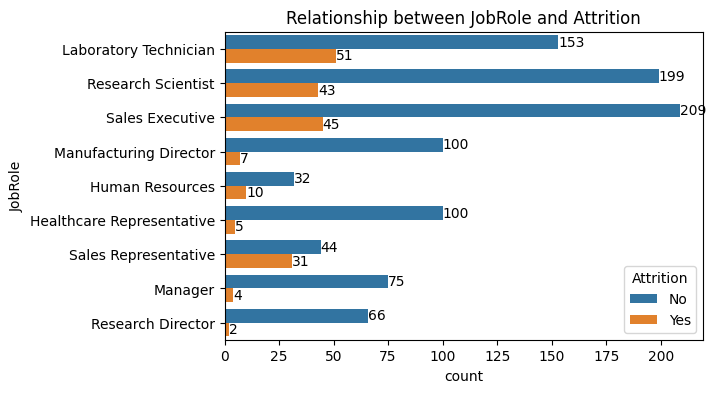

In [45]:
plt.figure(figsize=(21,4))
plt.subplot(1,3,1)
ax= sns.countplot(y='JobRole',hue='Attrition',data=training_data)
for label in ax.containers:
    ax.bar_label(label)
plt.title("Relationship between JobRole and Attrition")


According to graph, Employees who are Sales Representatives, Laboratory Technician, Research Scientist , Sales Executive and HR left more as compared to others.

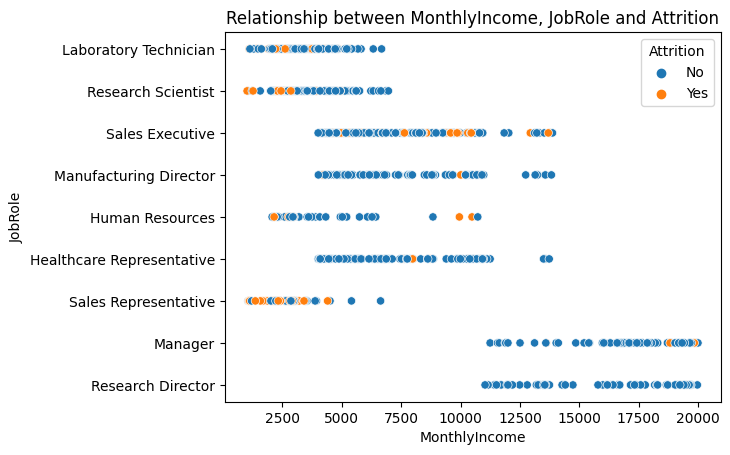

In [46]:
ax1=sns.scatterplot(x='MonthlyIncome',y='JobRole',hue='Attrition',data=training_data)
for label in ax1.containers:
    ax1.bar_label(label)
plt.title("Relationship between MonthlyIncome, JobRole and Attrition")
plt.show()

<ipython-input-47-e2fa189cb034>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = training_data.corr()


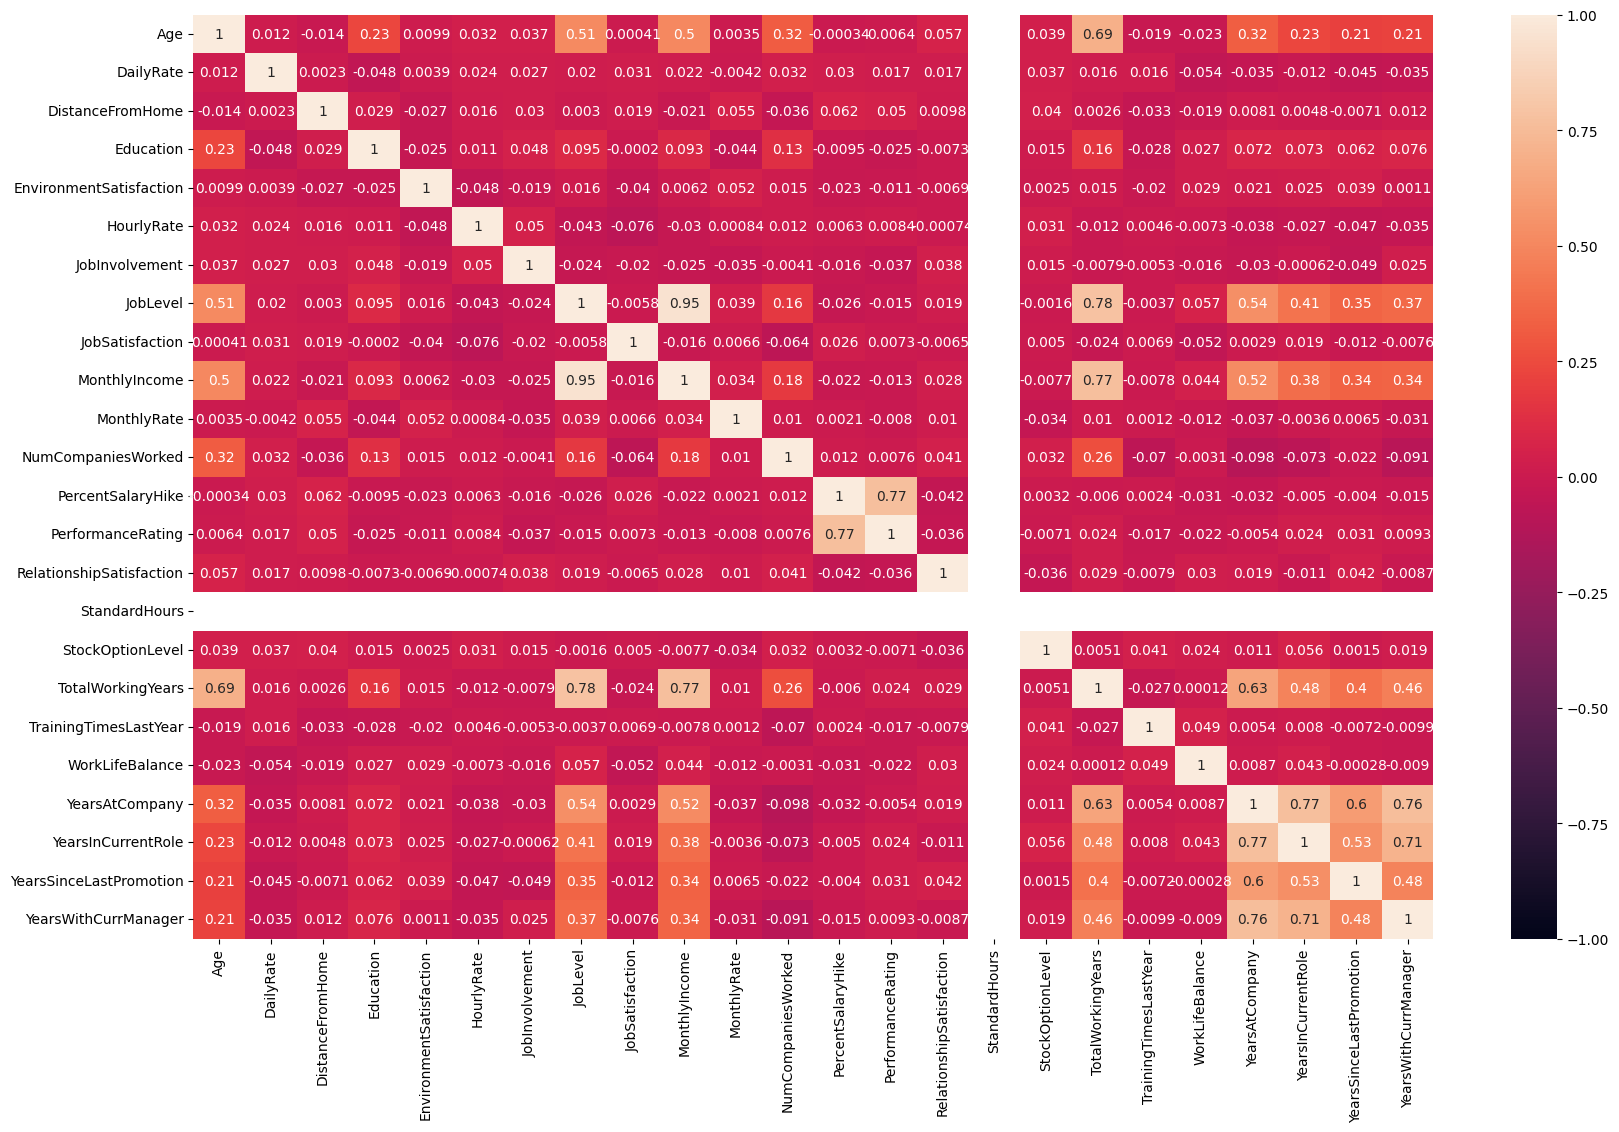

In [47]:
## Co-relation matrix using training data
fig,ax = plt.subplots(figsize = (20,12))
corr = training_data.corr()
sns.heatmap(corr,annot=True,vmax=1,vmin=-1)
plt.show()


Conclusion

1. job level has 51% correlated with age, 78% with total workingyears, 54% with yearsatcompany,39% with yearsincurrentrole, 36% with yearssincelastpromotion, 37% with yearswithcurrentmanager  and 95% with monthly income are strongly positively correlated.

2. yearsatcompany has 31% corelated with age, 54% with joblevel, 52% with monthlyIncome, 63% with totalworking years, 77% with years currentrole, 62% with yearssincelastpromotion and 76% with yearswithcurrent manager.

3. yearscurrentrole has 22% corelated with age, 39% with joblevel, 37% with monthlyIncome, 47% with totalworkingyears, 77% with yearsatcompany, 54% with yearssincelastpromotion and 71% with yearswithcurrent manager.

4. performancerating and percent salary hike are also positively corelated

5. Total working year has 68% correlated with age, 78% correlated with joblevel ,77% correlated with Momthlyincome, 63% with yearsatcompany, 47% with years currentrole, 41% with yearssincelastpromotion and 46% with yearswithcurrent manager.

6. Jobstatissfaction has 0.074 negatively correlated with hourlyrate ,0.12% years at company and 0.069 with numcompaniesworked

**Checking Normal Distribution in train & test data**

-----------Train data--------


In [48]:
training_data.head(2)

Age BusinessTravel  DailyRate              Department  DistanceFromHome  \
1097   24  Travel_Rarely        350  Research & Development                21   
727    18     Non-Travel        287  Research & Development                 5   

      Education    EducationField  EnvironmentSatisfaction Gender  HourlyRate  \
1097          2  Technical Degree                        3   Male          57   
727           2     Life Sciences                        2   Male          73   

      ...  StandardHours  StockOptionLevel TotalWorkingYears  \
1097  ...             80                 3                 2   
727   ...             80                 0                 0   

      TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
1097                      3               3               1   
727                       2               3               0   

      YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  \
1097                   1                        0                    0   
727                    0                        0                    0   

     Attrition  
1097        No  
727         No  

[2 rows x 33 columns]

In [49]:
training_data.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [50]:
#checking normal distribution of numerical data


In [51]:
num3=training_data.select_dtypes(exclude='object')   #selecting numerical column

In [52]:
num3.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [53]:
#There are several columns in the data that have numeric values that represent categories, like Education that has values of 1 through 5 representing different levels of education.
#so dropping these columns
num3.drop(["Education","EnvironmentSatisfaction", "JobInvolvement","JobLevel" ,"JobSatisfaction" ,"RelationshipSatisfaction",
           "StockOptionLevel","WorkLifeBalance"],axis=1, inplace=True)


In [54]:
#create a function of graph
import scipy.stats as stats
def plotting_graph(num,var) :
    plt.figure(figsize=(15,3))  #set figure size

    plt.subplot(1,3,1)    # it has 1 row, 3 figure, this is 1st figure
    sns.boxplot(x=num[var])

    plt.subplot(1,3,2)    # it has 1 row, 3 figure, this is 2nd figure

    (num[var]).plot(kind='kde',color='r')

    plt.subplot(1,3,3)     # it has 1 row, 3 figure, this is 3rd figure
    stats.probplot(num[var],plot=plt)

    plt.show()

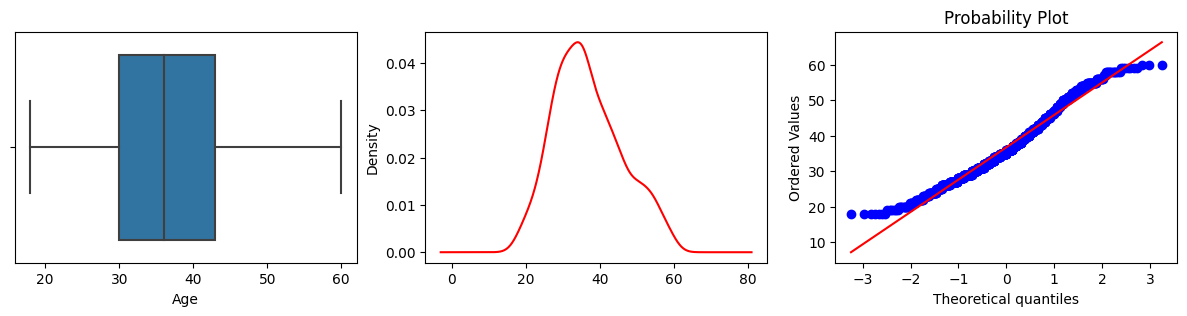

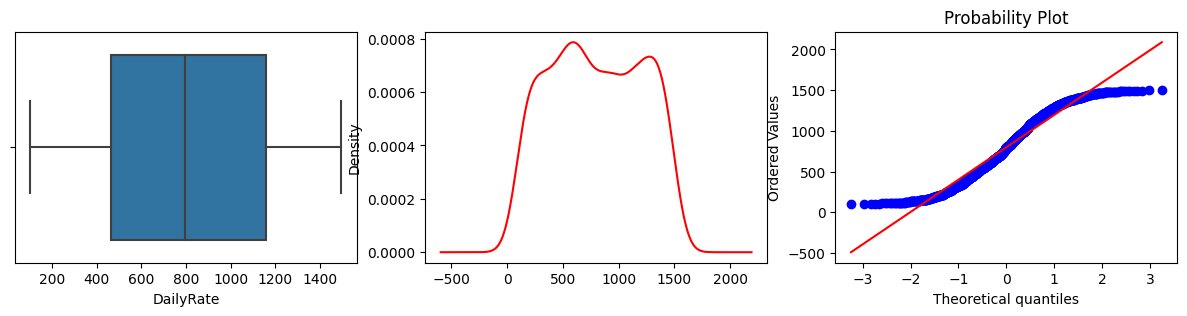

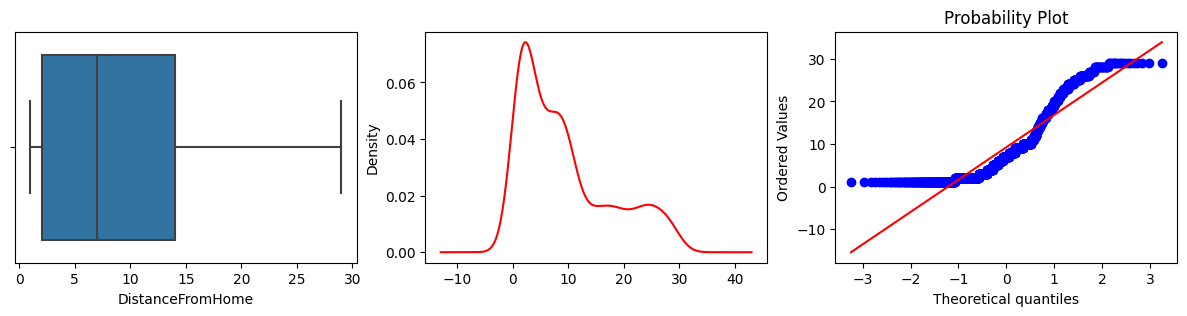

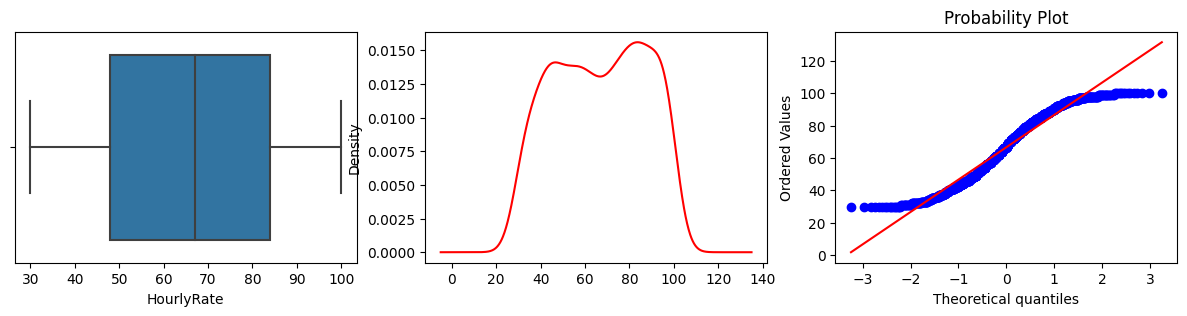

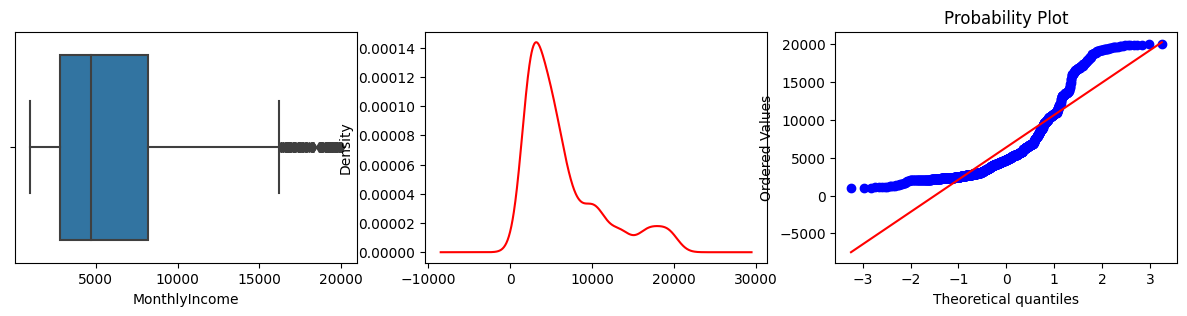

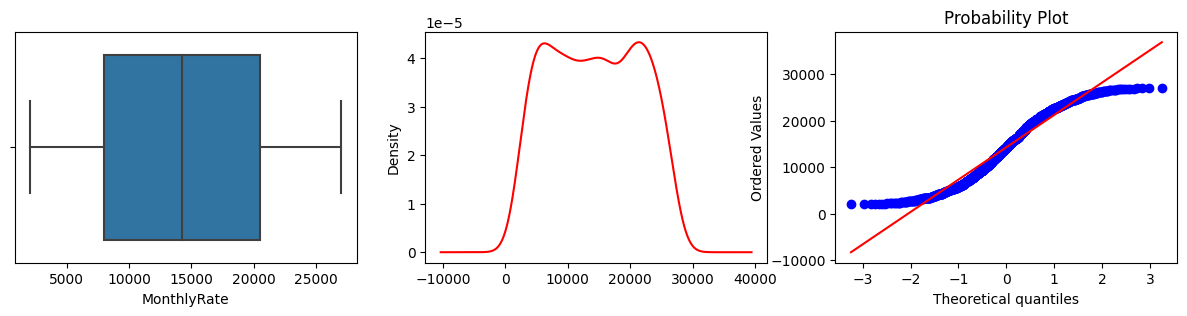

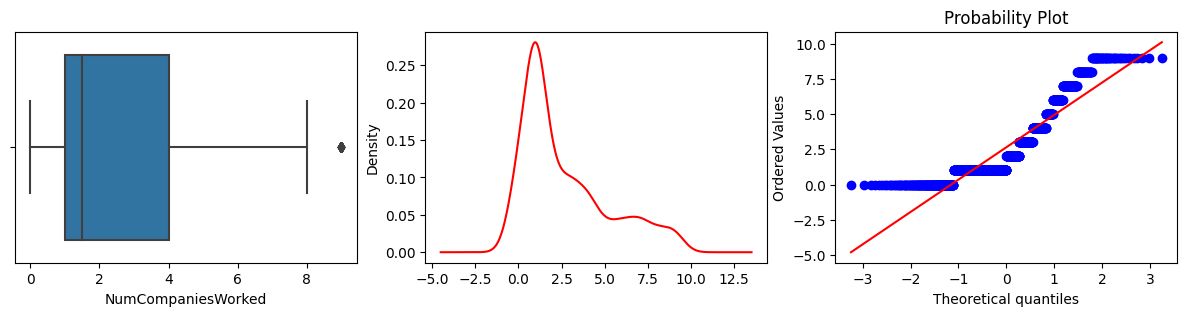

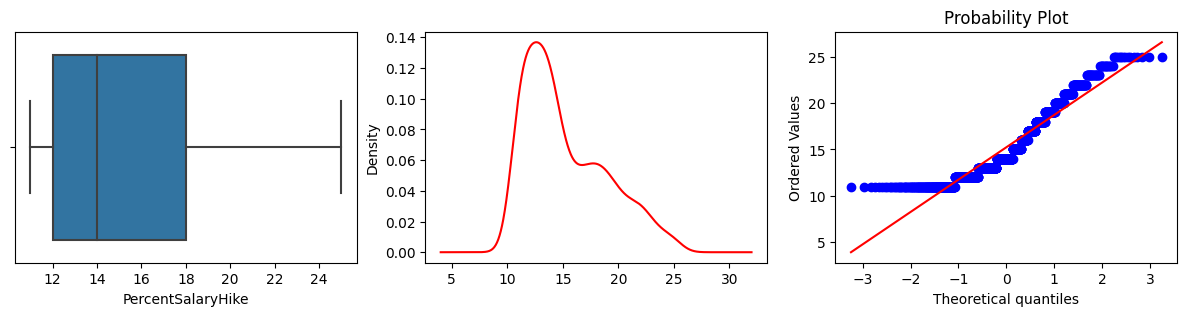

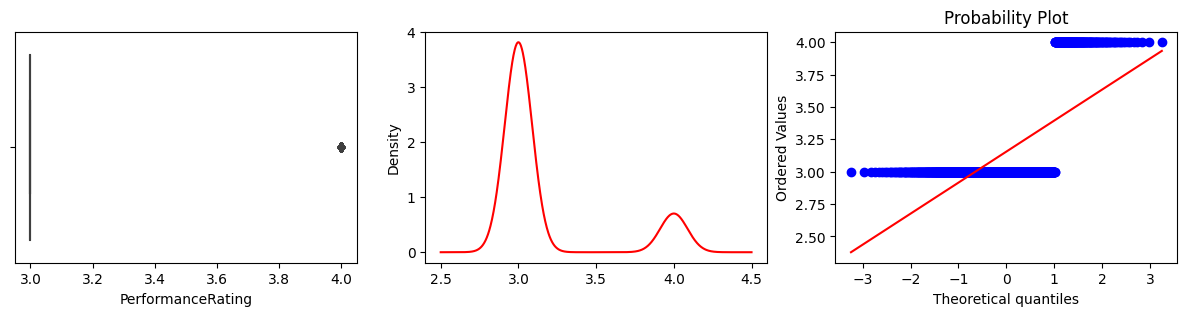

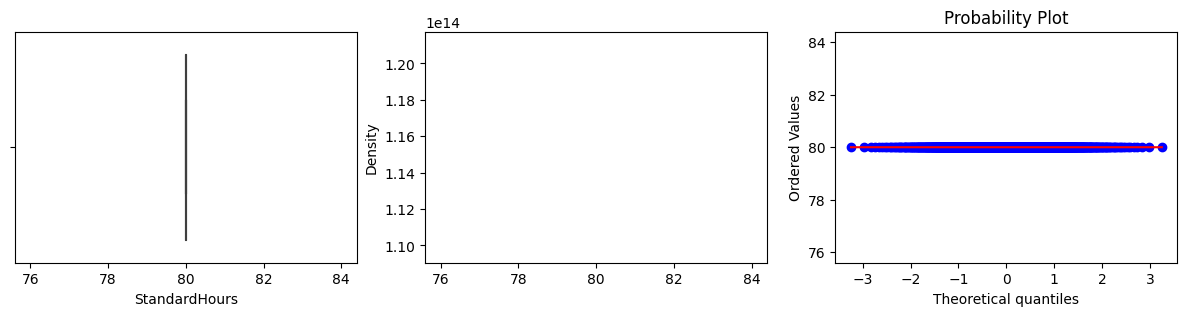

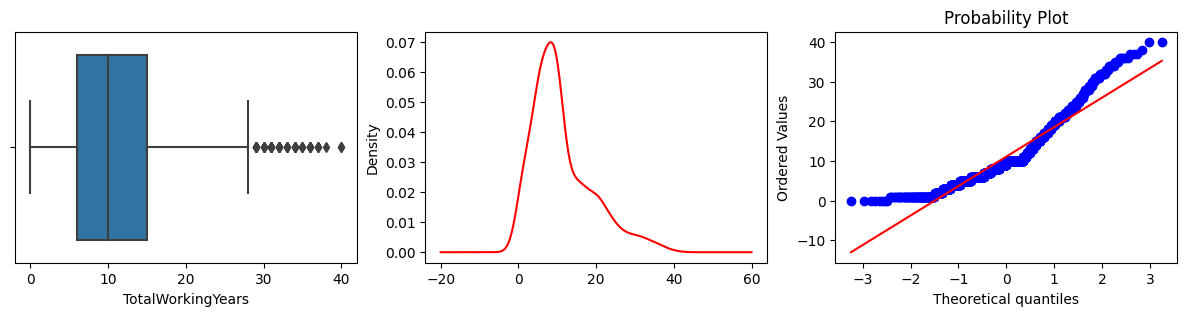

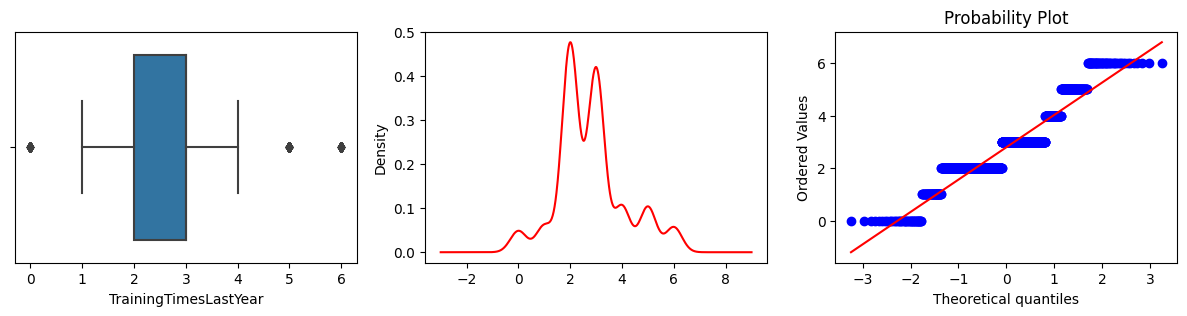

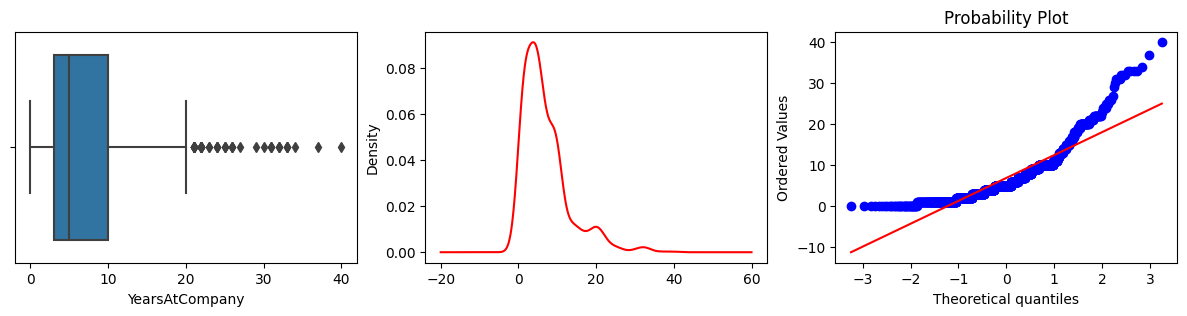

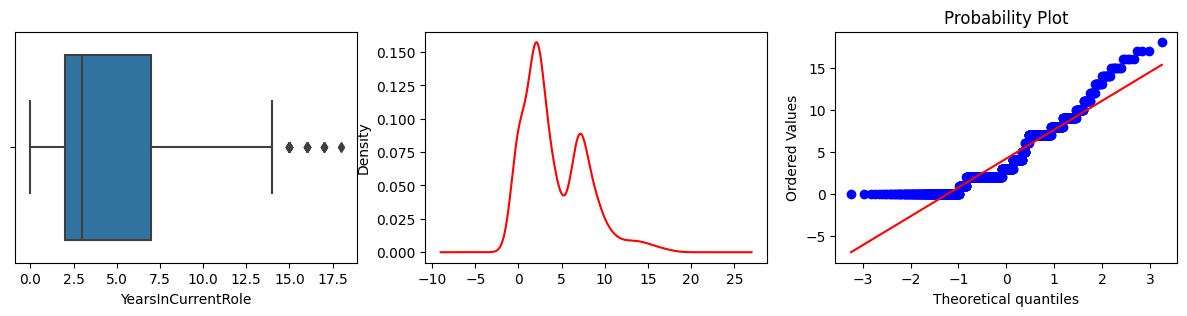

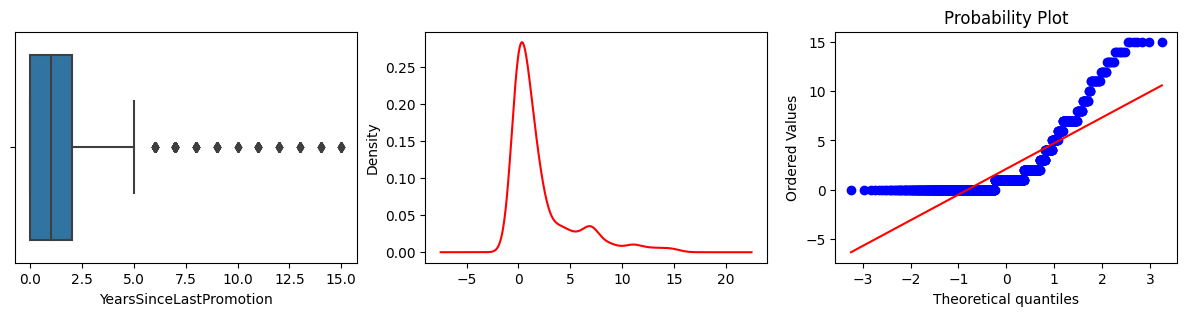

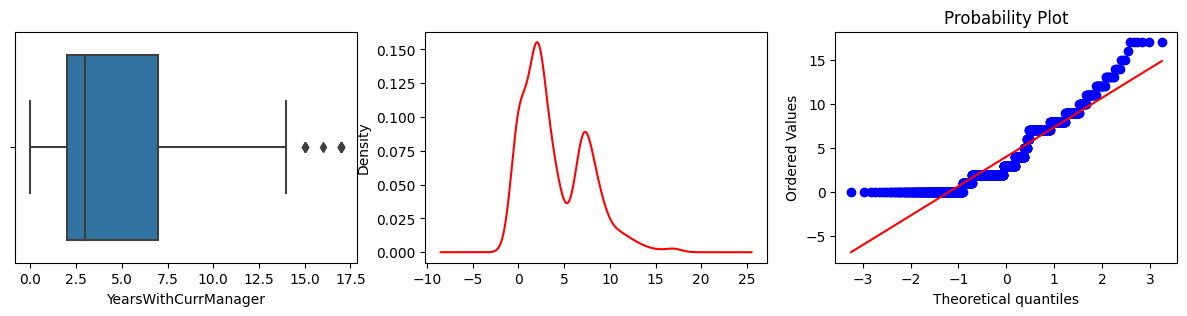

In [55]:
for i in num3.columns :          #i iterate each column 1 by one
    plotting_graph(num3,i)             #calling the function

In [56]:
#create a function of graph

def plotting_graph_yeo4(Numeric_train_data,var) :
    plt.figure(figsize=(15,3))  #set figure size

    plt.subplot(1,3,1)    # it has 1 row, 3 figure, this is 1st figure
    sns.boxplot(x=Numeric_train_data[var+'_yeo_johnson'])

    plt.subplot(1,3,2)    # it has 1 row, 3 figure, this is 2nd figure
    (Numeric_train_data[var+'_yeo_johnson']).plot(kind='kde',color='r')

    plt.subplot(1,3,3)     # it has 1 row, 3 figure, this is 3rd figure
    stats.probplot(Numeric_train_data[var+'_yeo_johnson'],plot=plt)

    plt.show()#

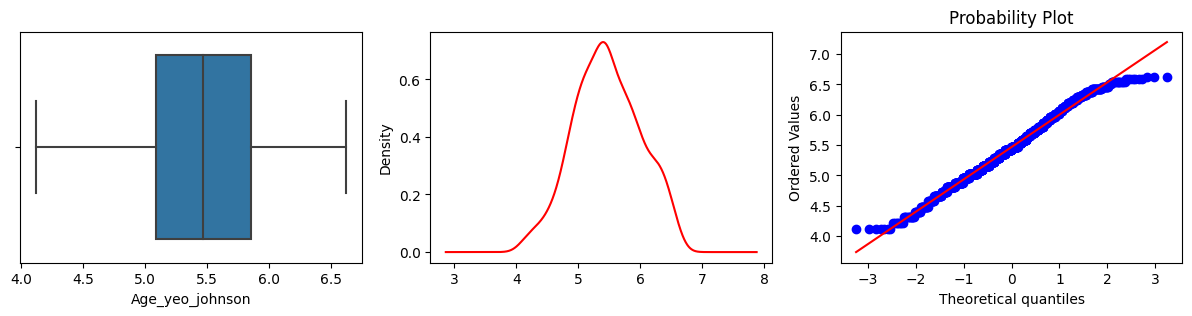

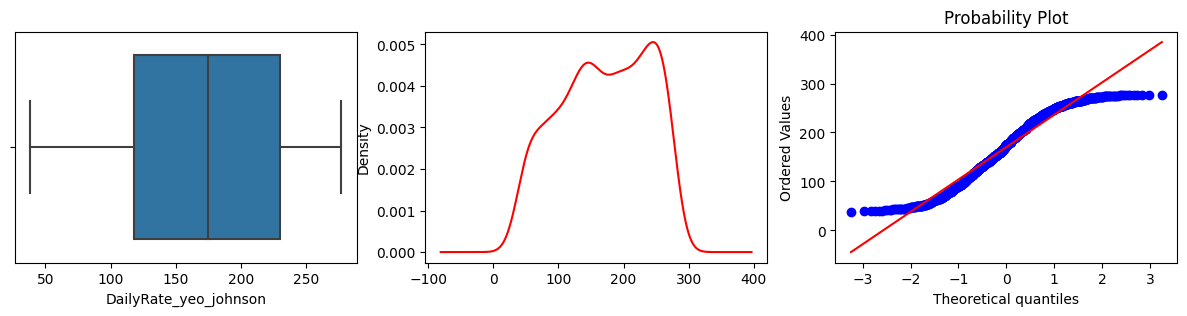

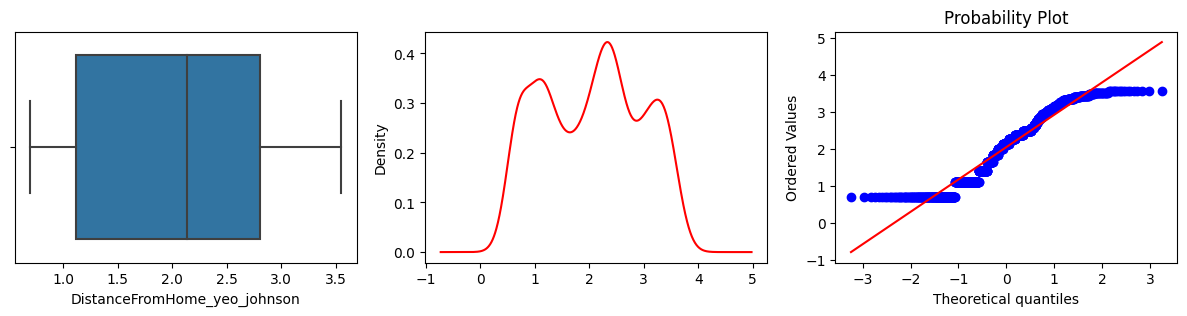

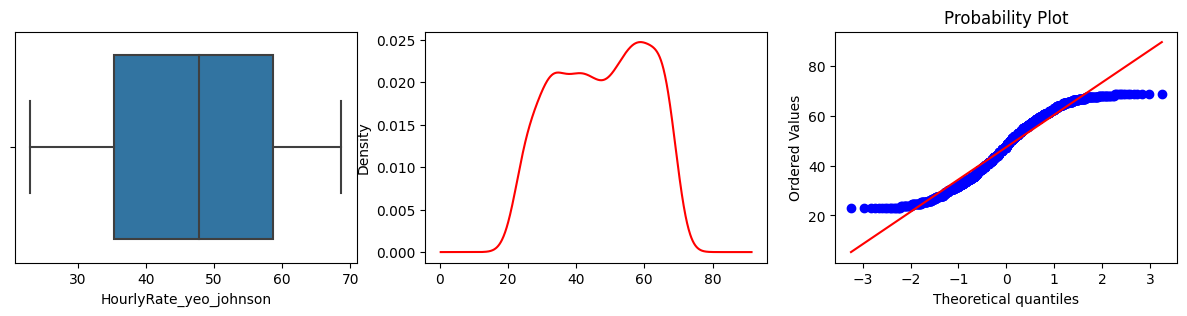

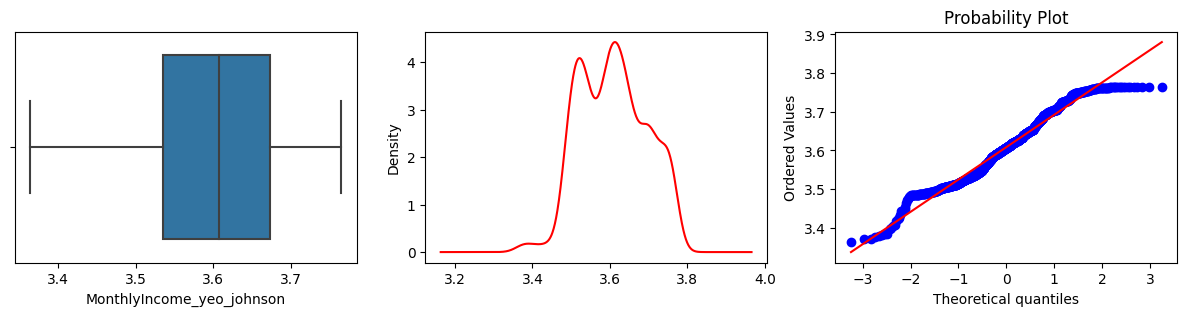

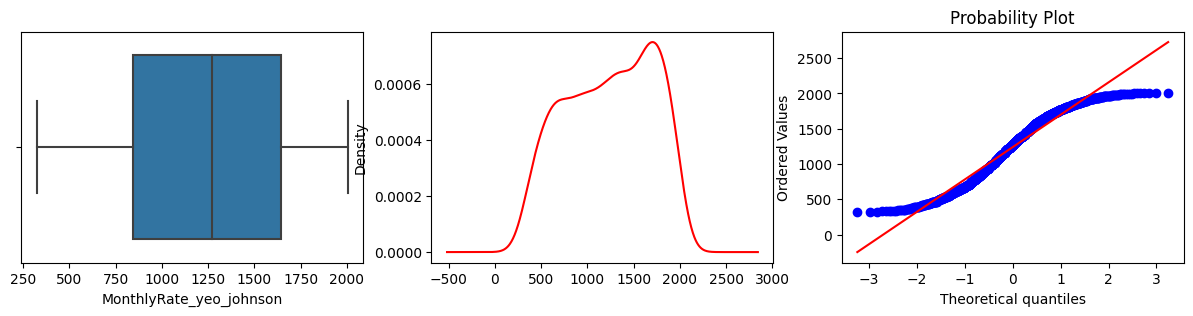

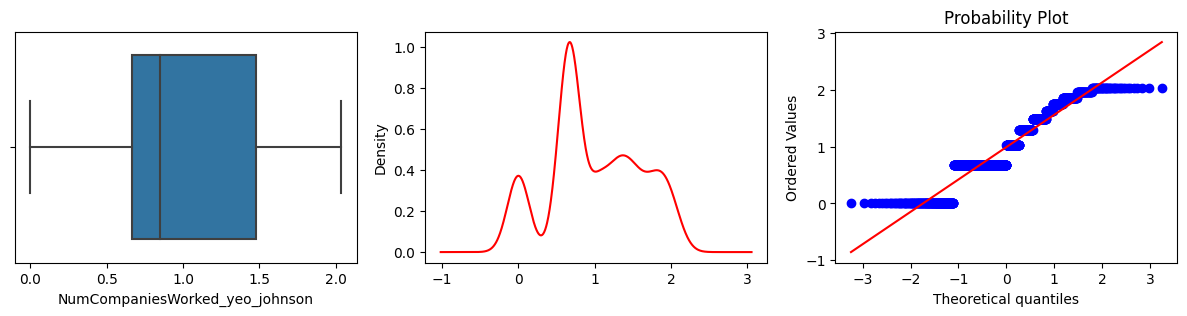

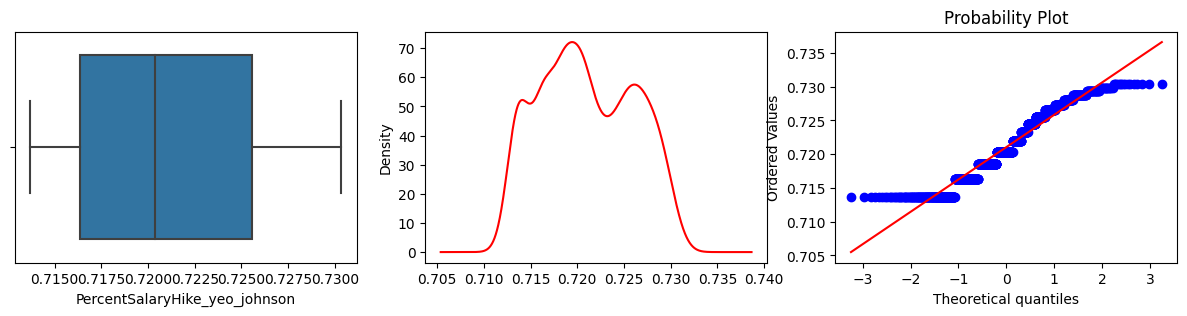

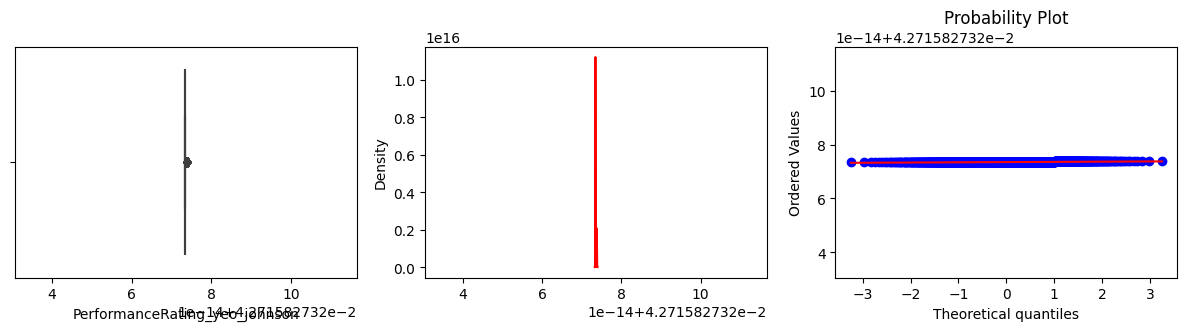

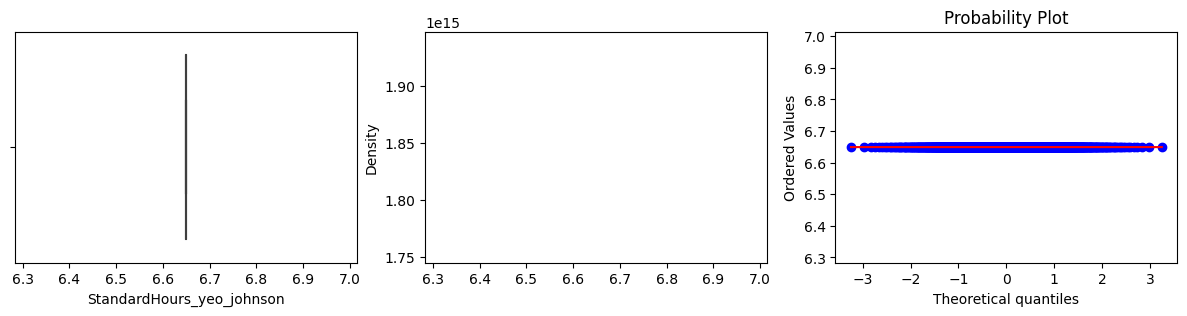

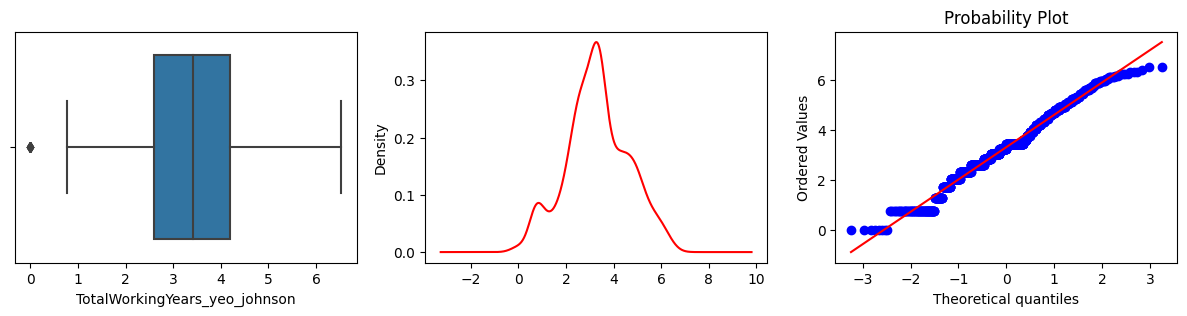

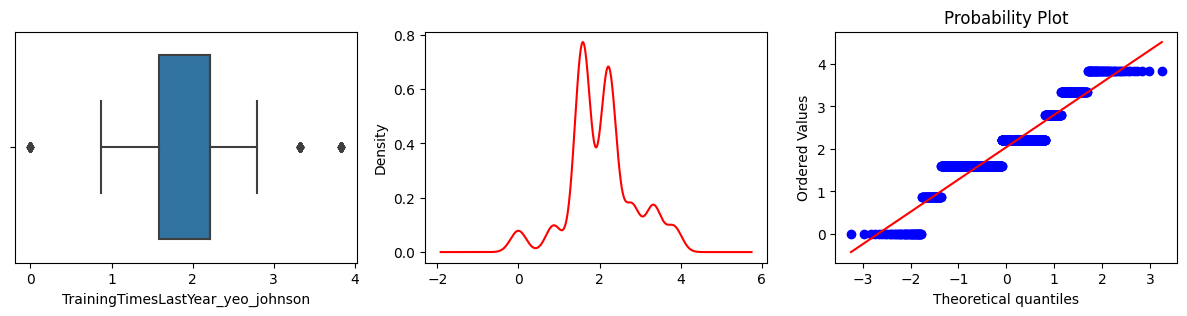

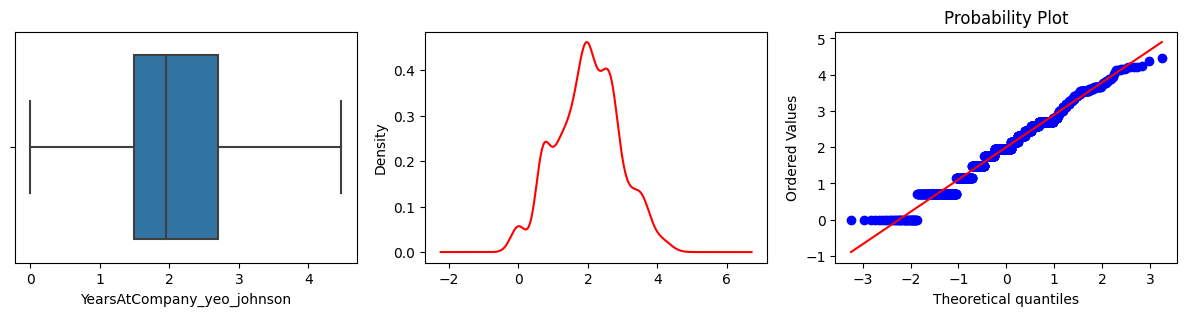

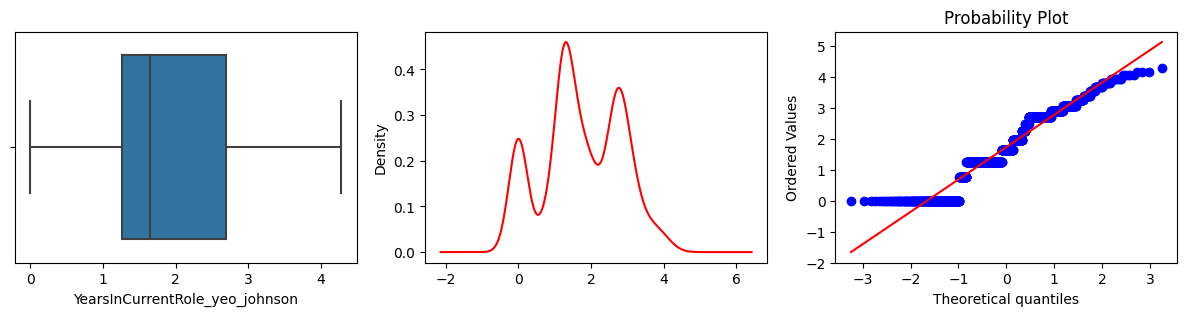

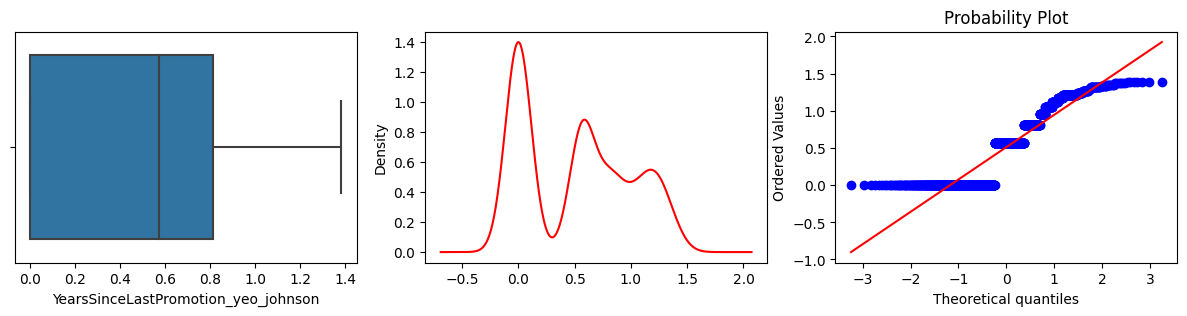

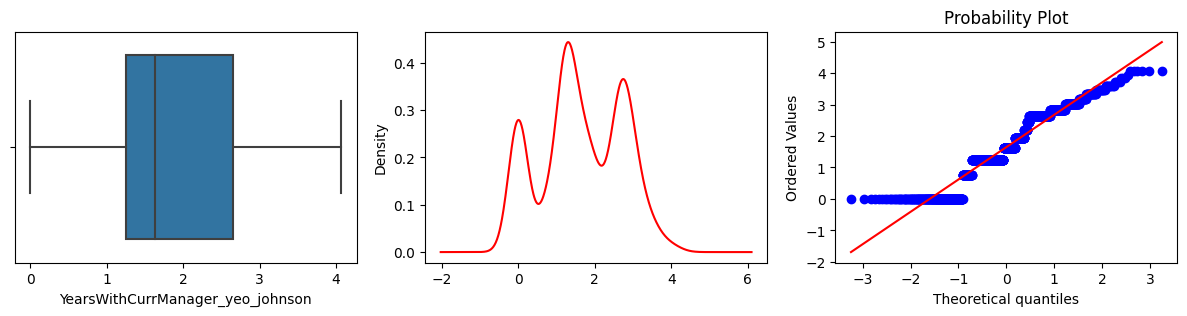

In [57]:
for i in num3.columns:
    num3[i+'_yeo_johnson'] , alpa = stats.yeojohnson(num3[i])

    plotting_graph_yeo4(num3 , i)   #call the function


In [58]:
num3.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'StandardHours', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Age_yeo_johnson',
       'DailyRate_yeo_johnson', 'DistanceFromHome_yeo_johnson',
       'HourlyRate_yeo_johnson', 'MonthlyIncome_yeo_johnson',
       'MonthlyRate_yeo_johnson', 'NumCompaniesWorked_yeo_johnson',
       'PercentSalaryHike_yeo_johnson', 'PerformanceRating_yeo_johnson',
       'StandardHours_yeo_johnson', 'TotalWorkingYears_yeo_johnson',
       'TrainingTimesLastYear_yeo_johnson', 'YearsAtCompany_yeo_johnson',
       'YearsInCurrentRole_yeo_johnson', 'YearsSinceLastPromotion_yeo_johnson',
       'YearsWithCurrManager_yeo_johnson'],
      dtype='object')

removing columns with zero variance from the data since these can lead to errors in model fitting

In [59]:
#dropping previous column and keeping yeo jhonson column
num3.drop(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'StandardHours', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager','PerformanceRating_yeo_johnson',
       'StandardHours_yeo_johnson'
       ],axis=1,inplace=True)

In [60]:
training_data.drop(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'StandardHours', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'
       ],axis=1, inplace=True)

In [61]:
#concat yeojhonson column to training data
training_data= pd.concat([training_data,num3], axis=1)

In [62]:
training_data.columns

Index(['BusinessTravel', 'Department', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime',
       'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance',
       'Attrition', 'Age_yeo_johnson', 'DailyRate_yeo_johnson',
       'DistanceFromHome_yeo_johnson', 'HourlyRate_yeo_johnson',
       'MonthlyIncome_yeo_johnson', 'MonthlyRate_yeo_johnson',
       'NumCompaniesWorked_yeo_johnson', 'PercentSalaryHike_yeo_johnson',
       'TotalWorkingYears_yeo_johnson', 'TrainingTimesLastYear_yeo_johnson',
       'YearsAtCompany_yeo_johnson', 'YearsInCurrentRole_yeo_johnson',
       'YearsSinceLastPromotion_yeo_johnson',
       'YearsWithCurrManager_yeo_johnson'],
      dtype='object')

-----------Test data-----------

In [63]:
test_data.head(2)

Age BusinessTravel  DailyRate              Department  DistanceFromHome  \
1041   28  Travel_Rarely        866                   Sales                 5   
184    53  Travel_Rarely       1084  Research & Development                13   

      Education EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
1041          3        Medical                        4    Male          84   
184           2        Medical                        4  Female          57   

      ...  StandardHours  StockOptionLevel TotalWorkingYears  \
1041  ...             80                 0                 6   
184   ...             80                 2                 5   

      TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
1041                      4               3               5   
184                       3               3               4   

      YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  \
1041                   4                        1                    3   
184                    2                        1                    3   

     Attrition  
1041        No  
184         No  

[2 rows x 33 columns]

In [64]:
#checking normal distribution of numerical data
num4=test_data.select_dtypes(exclude='object')

In [65]:
num4.drop(["Education","EnvironmentSatisfaction", "JobInvolvement","JobLevel" ,"JobSatisfaction" ,"RelationshipSatisfaction",
           "StockOptionLevel","WorkLifeBalance"],axis=1, inplace=True)

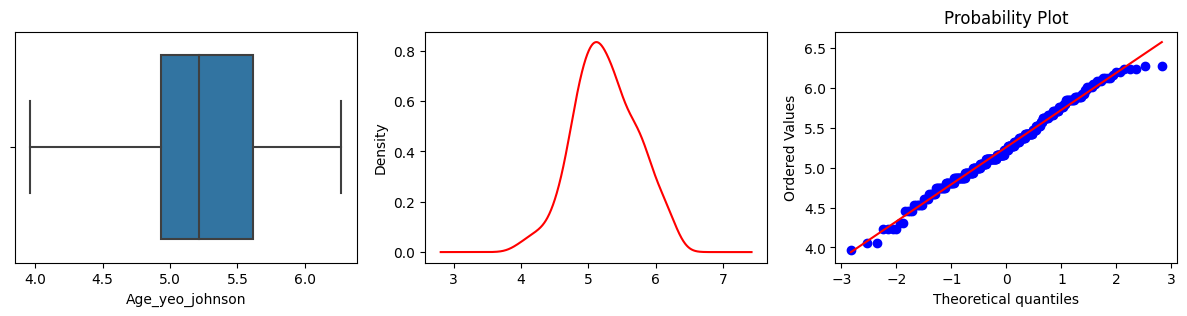

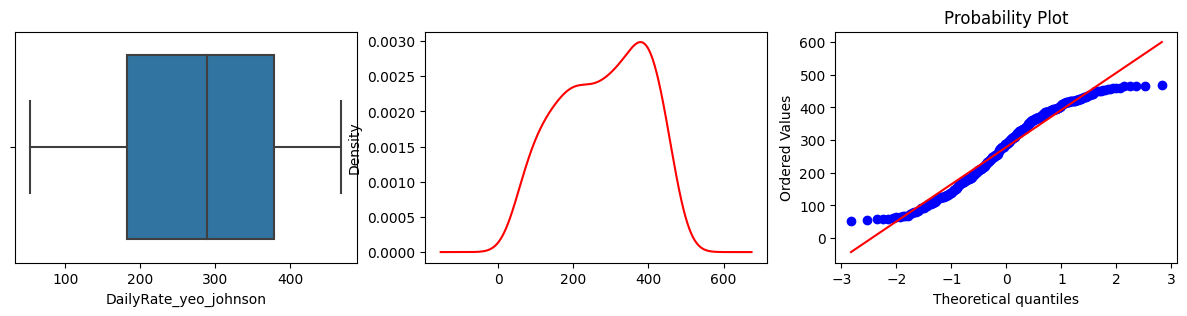

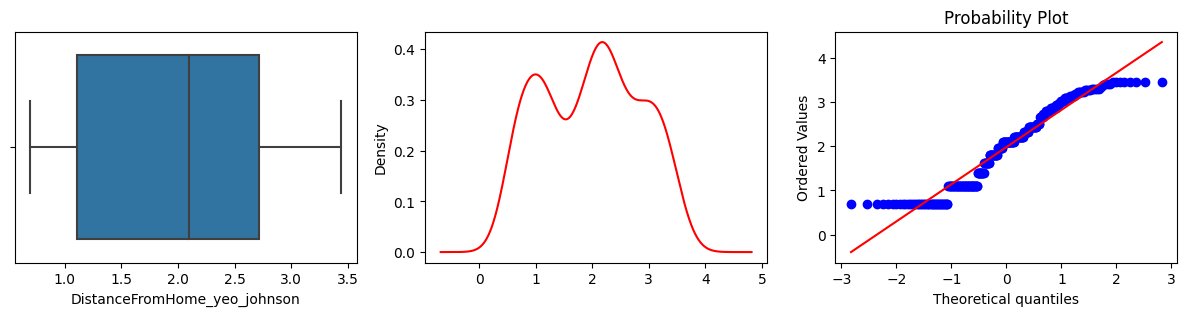

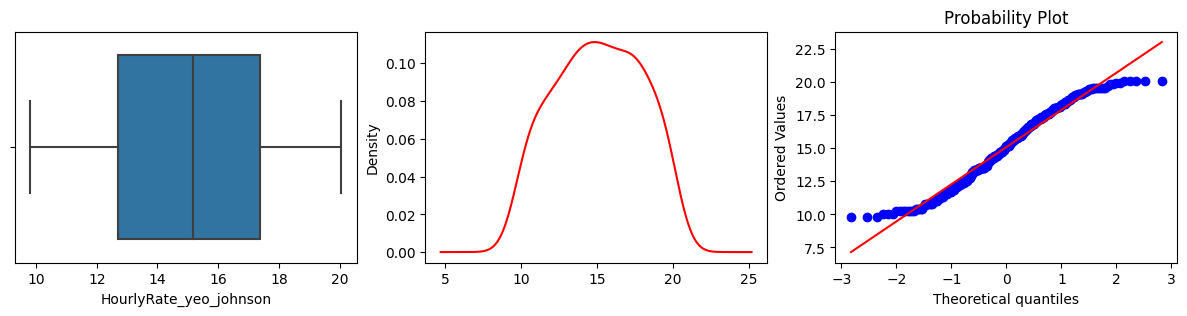

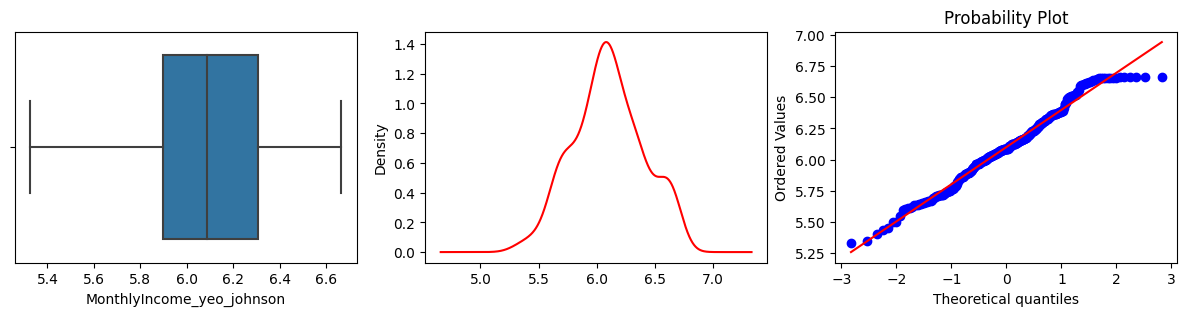

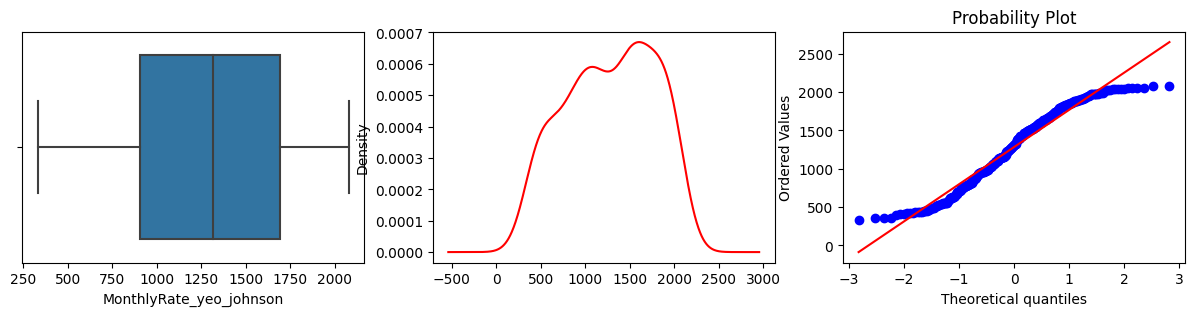

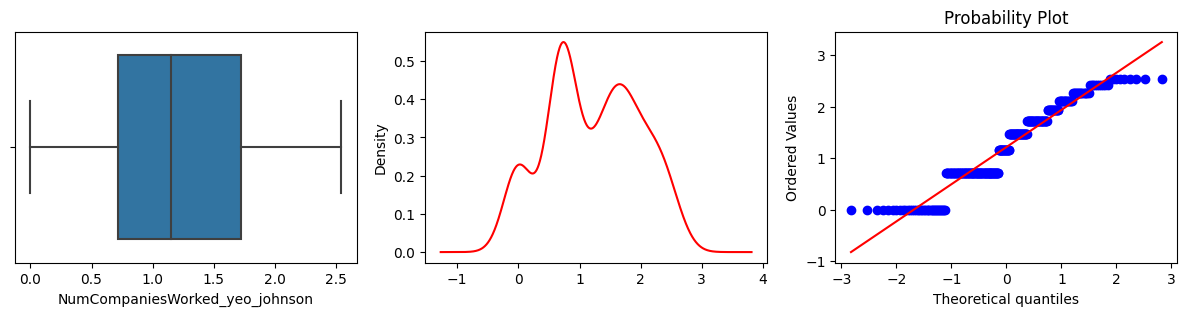

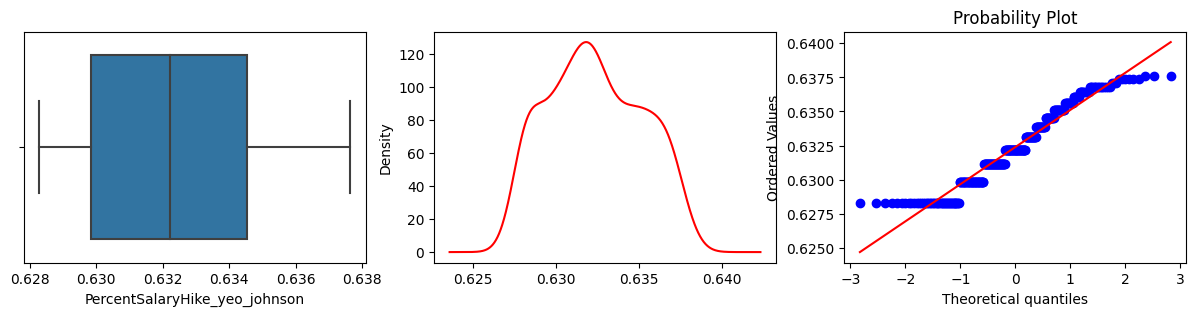

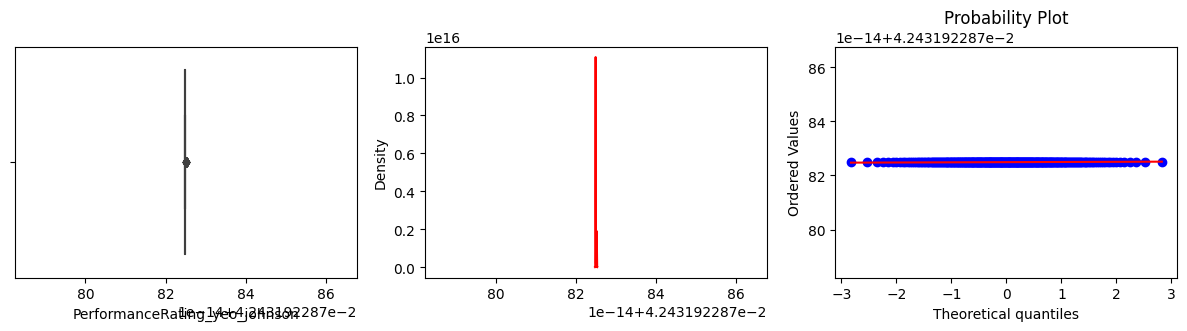

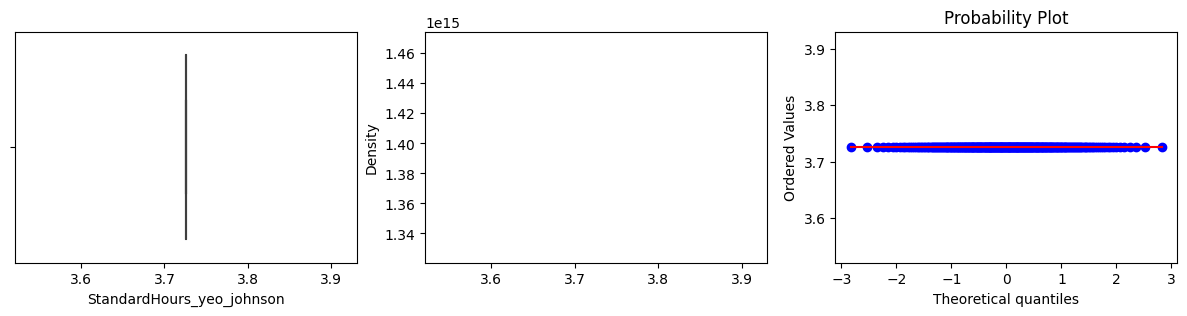

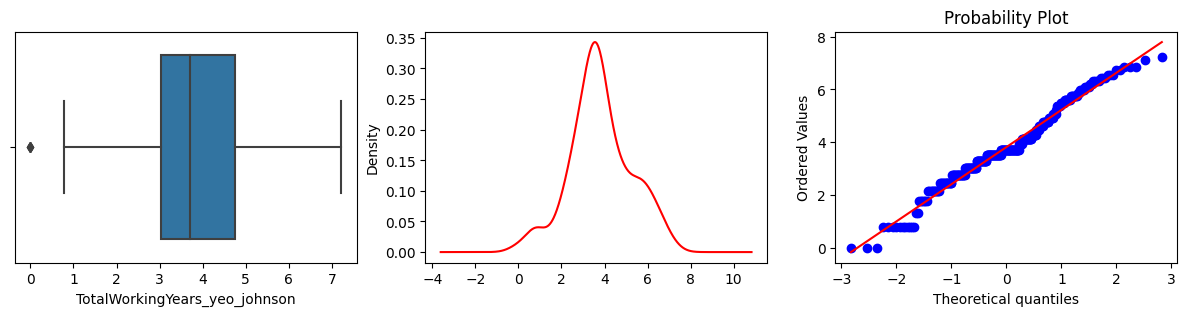

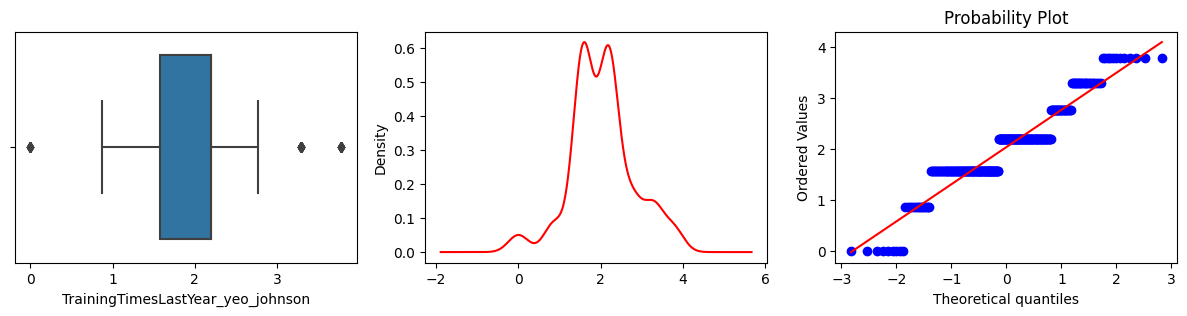

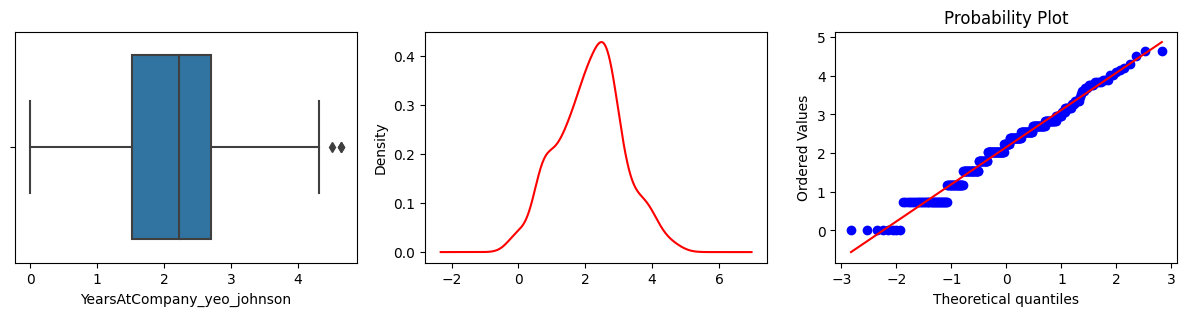

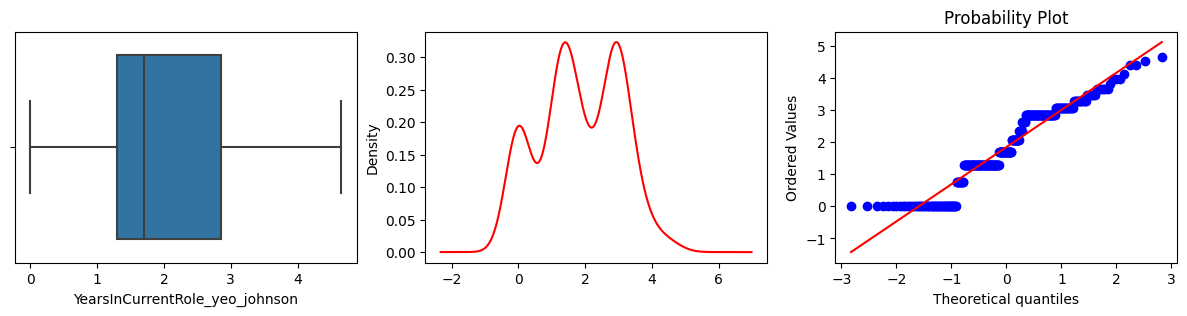

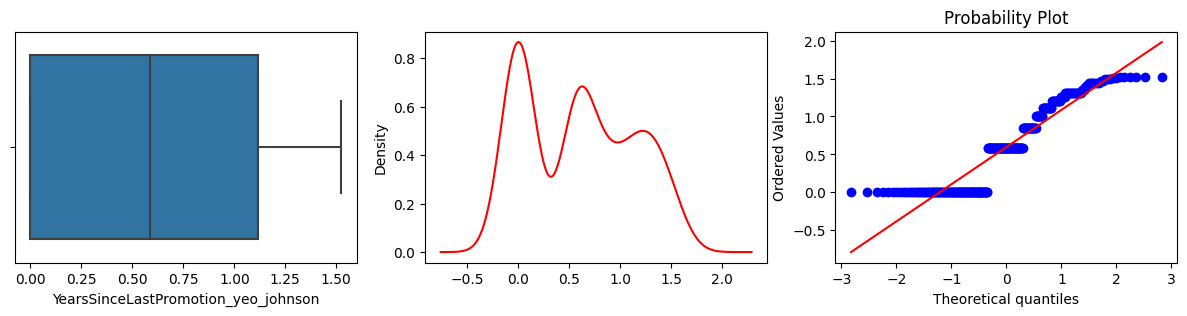

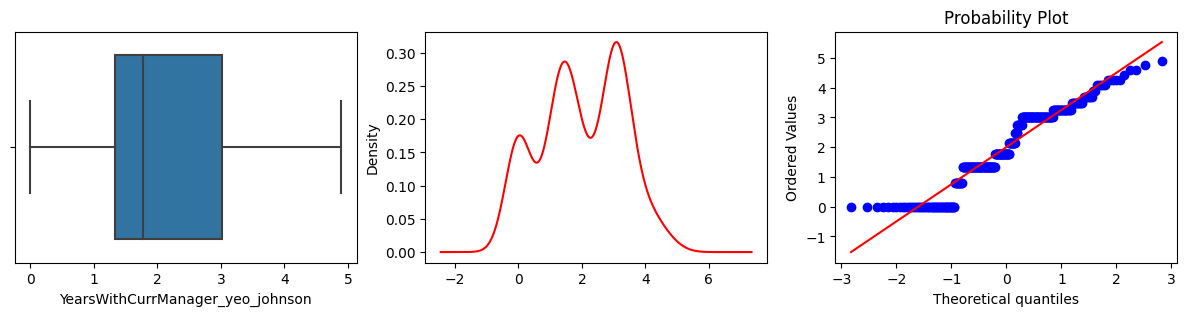

In [66]:
for i in num4.columns:
    num4[i+'_yeo_johnson'] , alpa = stats.yeojohnson(num4[i])

    plotting_graph_yeo4(num4 , i)   #call the function


In [67]:
num4.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'StandardHours', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Age_yeo_johnson',
       'DailyRate_yeo_johnson', 'DistanceFromHome_yeo_johnson',
       'HourlyRate_yeo_johnson', 'MonthlyIncome_yeo_johnson',
       'MonthlyRate_yeo_johnson', 'NumCompaniesWorked_yeo_johnson',
       'PercentSalaryHike_yeo_johnson', 'PerformanceRating_yeo_johnson',
       'StandardHours_yeo_johnson', 'TotalWorkingYears_yeo_johnson',
       'TrainingTimesLastYear_yeo_johnson', 'YearsAtCompany_yeo_johnson',
       'YearsInCurrentRole_yeo_johnson', 'YearsSinceLastPromotion_yeo_johnson',
       'YearsWithCurrManager_yeo_johnson'],
      dtype='object')

In [68]:
#dropping previous column and keeping yeo jhonson column
num4.drop(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'StandardHours', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager','PerformanceRating_yeo_johnson',
       'StandardHours_yeo_johnson'],axis=1,inplace=True)

In [69]:
test_data.drop(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'StandardHours', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],axis=1, inplace=True)

In [70]:
#concat yeojhonson column to test data
test_data= pd.concat([test_data,num4], axis=1)

In [71]:
test_data.shape

(294, 31)

In [72]:
training_data.shape

(1176, 31)

**Converting categorical feature to numerical**

------training data-------

In [73]:
training_data.select_dtypes(include='object').columns     #checking categorical columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime', 'Attrition'],
      dtype='object')

In [74]:
for i in training_data.select_dtypes(include='object').columns:    #checking unique values of all the column
    print(i,"--",dict(training_data[i].value_counts()))

BusinessTravel -- {'Travel_Rarely': 835, 'Travel_Frequently': 228, 'Non-Travel': 113}
Department -- {'Research & Development': 765, 'Sales': 361, 'Human Resources': 50}
EducationField -- {'Life Sciences': 491, 'Medical': 369, 'Marketing': 124, 'Technical Degree': 101, 'Other': 69, 'Human Resources': 22}
Gender -- {'Male': 707, 'Female': 469}
JobRole -- {'Sales Executive': 254, 'Research Scientist': 242, 'Laboratory Technician': 204, 'Manufacturing Director': 107, 'Healthcare Representative': 105, 'Manager': 79, 'Sales Representative': 75, 'Research Director': 68, 'Human Resources': 42}
MaritalStatus -- {'Married': 550, 'Single': 359, 'Divorced': 267}
Over18 -- {'Y': 1176}
OverTime -- {'No': 837, 'Yes': 339}
Attrition -- {'No': 978, 'Yes': 198}


I applied ordinal encoding in column BusinessTravel and MaritalStatus.

One hot encoding in column Department, EducationField, Gender, JobRole, Over18, OverTime

label Encoding in column Attrition

In [75]:
#using column transformer to encode the categorical column into numerical

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
transformer = ColumnTransformer(transformers=[
    ('tnf1',OrdinalEncoder(categories=[['Travel_Frequently','Travel_Rarely','Non-Travel']]),['BusinessTravel']),
    ('tnf2',OrdinalEncoder(categories=[['Single','Married','Divorced']]),['MaritalStatus']),
    ('tnf3',OneHotEncoder(sparse=False,drop='first'),['Department','EducationField', 'Gender', 'JobRole', 'Over18', 'OverTime'])
],remainder='passthrough')


In [76]:

training_data.shape

(1176, 31)

In [77]:
c=transformer.fit_transform(training_data)      #fit the training data

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [78]:
transformer.get_feature_names_out()          #extract feature name

array(['tnf1__BusinessTravel', 'tnf2__MaritalStatus',
       'tnf3__Department_Research & Development',
       'tnf3__Department_Sales', 'tnf3__EducationField_Life Sciences',
       'tnf3__EducationField_Marketing', 'tnf3__EducationField_Medical',
       'tnf3__EducationField_Other',
       'tnf3__EducationField_Technical Degree', 'tnf3__Gender_Male',
       'tnf3__JobRole_Human Resources',
       'tnf3__JobRole_Laboratory Technician', 'tnf3__JobRole_Manager',
       'tnf3__JobRole_Manufacturing Director',
       'tnf3__JobRole_Research Director',
       'tnf3__JobRole_Research Scientist',
       'tnf3__JobRole_Sales Executive',
       'tnf3__JobRole_Sales Representative', 'tnf3__OverTime_Yes',
       'remainder__Education', 'remainder__EnvironmentSatisfaction',
       'remainder__JobInvolvement', 'remainder__JobLevel',
       'remainder__JobSatisfaction',
       'remainder__RelationshipSatisfaction',
       'remainder__StockOptionLevel', 'remainder__WorkLifeBalance',
       'remainder

In [79]:
#converting array into dataframe and stored into new variable
train_data1=pd.DataFrame(c, index=training_data.index)
train_data1.columns = transformer.get_feature_names_out()         #changing onehotd column name into chaned feature name
train_data1.head(2)

tnf1__BusinessTravel tnf2__MaritalStatus  \
1097                  1.0                 2.0   
727                   2.0                 0.0   

     tnf3__Department_Research & Development tnf3__Department_Sales  \
1097                                     1.0                    0.0   
727                                      1.0                    0.0   

     tnf3__EducationField_Life Sciences tnf3__EducationField_Marketing  \
1097                                0.0                            0.0   
727                                 1.0                            0.0   

     tnf3__EducationField_Medical tnf3__EducationField_Other  \
1097                          0.0                        0.0   
727                           0.0                        0.0   

     tnf3__EducationField_Technical Degree tnf3__Gender_Male  ...  \
1097                                   1.0               1.0  ...   
727                                    0.0               1.0  ...   

     remainder__MonthlyIncome_yeo_johnson remainder__MonthlyRate_yeo_johnson  \
1097                             3.504384                         990.071134   
727                              3.371561                        1222.608008   

     remainder__NumCompaniesWorked_yeo_johnson  \
1097                                      -0.0   
727                                   0.667506   

     remainder__PercentSalaryHike_yeo_johnson  \
1097                                 0.720383   
727                                  0.721969   

     remainder__TotalWorkingYears_yeo_johnson  \
1097                                 1.286154   
727                                       0.0   

     remainder__TrainingTimesLastYear_yeo_johnson  \
1097                                     2.218403   
727                                      1.586372   

     remainder__YearsAtCompany_yeo_johnson  \
1097                              0.717046   
727                                    0.0   

     remainder__YearsInCurrentRole_yeo_johnson  \
1097                                   0.75412   
727                                        0.0   

     remainder__YearsSinceLastPromotion_yeo_johnson  \
1097                                           -0.0   
727                                            -0.0   

     remainder__YearsWithCurrManager_yeo_johnson  
1097                                         0.0  
727                                          0.0  

[2 rows x 42 columns]

In [80]:
#apply same in test data
d= transformer.transform(test_data)
d.shape

(294, 42)

In [81]:

#converting array into dataframe and stored into new variable
test_data1=pd.DataFrame(d, index=test_data.index)
test_data1.columns = transformer.get_feature_names_out()         #changing onehotd column name into chaned feature name
test_data1.head(2)

tnf1__BusinessTravel tnf2__MaritalStatus  \
1041                  1.0                 0.0   
184                   1.0                 2.0   

     tnf3__Department_Research & Development tnf3__Department_Sales  \
1041                                     0.0                    1.0   
184                                      1.0                    0.0   

     tnf3__EducationField_Life Sciences tnf3__EducationField_Marketing  \
1041                                0.0                            0.0   
184                                 0.0                            0.0   

     tnf3__EducationField_Medical tnf3__EducationField_Other  \
1041                          1.0                        0.0   
184                           1.0                        0.0   

     tnf3__EducationField_Technical Degree tnf3__Gender_Male  ...  \
1041                                   0.0               1.0  ...   
184                                    0.0               0.0  ...   

     remainder__MonthlyIncome_yeo_johnson remainder__MonthlyRate_yeo_johnson  \
1041                             6.290656                        1884.867534   
184                              5.986523                        2041.082522   

     remainder__NumCompaniesWorked_yeo_johnson  \
1041                                       0.0   
184                                   0.713889   

     remainder__PercentSalaryHike_yeo_johnson  \
1041                                 0.635111   
184                                  0.628286   

     remainder__TotalWorkingYears_yeo_johnson  \
1041                                 2.763974   
184                                  2.471947   

     remainder__TrainingTimesLastYear_yeo_johnson  \
1041                                     2.763697   
184                                      2.197883   

     remainder__YearsAtCompany_yeo_johnson  \
1041                              2.026237   
184                               1.797024   

     remainder__YearsInCurrentRole_yeo_johnson  \
1041                                   2.05155   
184                                   1.294029   

     remainder__YearsSinceLastPromotion_yeo_johnson  \
1041                                       0.588644   
184                                        0.588644   

     remainder__YearsWithCurrManager_yeo_johnson  
1041                                     1.76765  
184                                      1.76765  

[2 rows x 42 columns]

In [82]:

#perform label encoding in Attrition
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() #creating object
attritionlr= le.fit_transform(training_data['Attrition'])   #it will give the result in the form of array
attritionlr2=pd.DataFrame(attritionlr, index=training_data.index)   #converting the array into dataframe
attritionlr2.head(2)

0
1097  0
727   0

In [83]:
#change column name
attritionlr2.columns= ['Attrition_new']
attritionlr2.head(2)

Attrition_new
1097              0
727               0

In [84]:
#add transform data into training data using concat function
train_data1= pd.concat([train_data1,attritionlr2 ],axis=1)

In [85]:




train_data1.drop(['remainder__Attrition'],axis=1,inplace=True)

In [86]:
#doing same in test data
attritionlr1= le.transform(test_data['Attrition'])   #it will give the result in the form of array
attritionlr3=pd.DataFrame(attritionlr1, index=test_data.index)   #converting the array into dataframe
#change column name
attritionlr3.columns= ['Attrition_new']
#add transform data into training data using concat function
test_data1= pd.concat([test_data1,attritionlr3 ],axis=1)

In [87]:
test_data1.columns

Index(['tnf1__BusinessTravel', 'tnf2__MaritalStatus',
       'tnf3__Department_Research & Development', 'tnf3__Department_Sales',
       'tnf3__EducationField_Life Sciences', 'tnf3__EducationField_Marketing',
       'tnf3__EducationField_Medical', 'tnf3__EducationField_Other',
       'tnf3__EducationField_Technical Degree', 'tnf3__Gender_Male',
       'tnf3__JobRole_Human Resources', 'tnf3__JobRole_Laboratory Technician',
       'tnf3__JobRole_Manager', 'tnf3__JobRole_Manufacturing Director',
       'tnf3__JobRole_Research Director', 'tnf3__JobRole_Research Scientist',
       'tnf3__JobRole_Sales Executive', 'tnf3__JobRole_Sales Representative',
       'tnf3__OverTime_Yes', 'remainder__Education',
       'remainder__EnvironmentSatisfaction', 'remainder__JobInvolvement',
       'remainder__JobLevel', 'remainder__JobSatisfaction',
       'remainder__RelationshipSatisfaction', 'remainder__StockOptionLevel',
       'remainder__WorkLifeBalance', 'remainder__Attrition',
       'remainder__Ag

In [88]:
#removing old column
test_data1.drop(['remainder__Attrition'],axis=1,inplace=True)

**Feature Selection**

---Hypothesis testing in Numerical column in train data and tranform it on test data-----

In [89]:
train_data1.columns

Index(['tnf1__BusinessTravel', 'tnf2__MaritalStatus',
       'tnf3__Department_Research & Development', 'tnf3__Department_Sales',
       'tnf3__EducationField_Life Sciences', 'tnf3__EducationField_Marketing',
       'tnf3__EducationField_Medical', 'tnf3__EducationField_Other',
       'tnf3__EducationField_Technical Degree', 'tnf3__Gender_Male',
       'tnf3__JobRole_Human Resources', 'tnf3__JobRole_Laboratory Technician',
       'tnf3__JobRole_Manager', 'tnf3__JobRole_Manufacturing Director',
       'tnf3__JobRole_Research Director', 'tnf3__JobRole_Research Scientist',
       'tnf3__JobRole_Sales Executive', 'tnf3__JobRole_Sales Representative',
       'tnf3__OverTime_Yes', 'remainder__Education',
       'remainder__EnvironmentSatisfaction', 'remainder__JobInvolvement',
       'remainder__JobLevel', 'remainder__JobSatisfaction',
       'remainder__RelationshipSatisfaction', 'remainder__StockOptionLevel',
       'remainder__WorkLifeBalance', 'remainder__Age_yeo_johnson',
       'remaind

In [90]:
x_train=train_data1.drop(["Attrition_new"],axis=1)
y_train= train_data1["Attrition_new"]

In [91]:
num_col=train_data1.drop(['tnf1__BusinessTravel', 'tnf2__MaritalStatus',
       'tnf3__Department_Research & Development', 'tnf3__Department_Sales',
       'tnf3__EducationField_Life Sciences', 'tnf3__EducationField_Marketing',
       'tnf3__EducationField_Medical', 'tnf3__EducationField_Other',
       'tnf3__EducationField_Technical Degree', 'tnf3__Gender_Male',
       'tnf3__JobRole_Human Resources', 'tnf3__JobRole_Laboratory Technician',
       'tnf3__JobRole_Manager', 'tnf3__JobRole_Manufacturing Director',
       'tnf3__JobRole_Research Director', 'tnf3__JobRole_Research Scientist',
       'tnf3__JobRole_Sales Executive', 'tnf3__JobRole_Sales Representative',
       'tnf3__OverTime_Yes', 'remainder__Education',
       'remainder__EnvironmentSatisfaction', 'remainder__JobInvolvement',
       'remainder__JobLevel', 'remainder__JobSatisfaction',
       'remainder__RelationshipSatisfaction', 'remainder__StockOptionLevel',

       'remainder__WorkLifeBalance','Attrition_new' ],axis=1)

In [92]:
import scipy                                                         # importing library to do hypothesis testing
from scipy.stats import pearsonr

result= []        #creating a blank list

for i in num_col.columns:                #iterate numerical column one by one
    new= pearsonr(x_train[i], y_train)       #find corr and p value of each column with respect to dependent variable and store the result in a new variable

    result.append(new)      #add the result in a list

result=np.array(result)

print(result)

[[-1.69963142e-01  4.49009732e-09]
 [-3.79104837e-02  1.93894775e-01]
 [ 6.60465910e-02  2.35132306e-02]
 [ 3.55734156e-03  9.03008265e-01]
 [-2.15189664e-01  8.70658057e-14]
 [ 1.69468450e-02  5.61523968e-01]
 [ 5.02277697e-02  8.51222949e-02]
 [-2.42815608e-02  4.05453415e-01]
 [-2.18552838e-01  3.49221954e-14]
 [-6.39266805e-02  2.83694279e-02]
 [-2.02634435e-01  2.30913080e-12]
 [-2.07057010e-01  7.45209820e-13]
 [-6.05199139e-02  3.79776473e-02]
 [-1.88929516e-01  6.53559742e-11]]


In [93]:
p_values_traindata = pd.Series(result[: , 1],index=num_col.columns)       #selecting p value from the result
p_values_traindata

remainder__Age_yeo_johnson                        4.490097e-09
remainder__DailyRate_yeo_johnson                  1.938948e-01
remainder__DistanceFromHome_yeo_johnson           2.351323e-02
remainder__HourlyRate_yeo_johnson                 9.030083e-01
remainder__MonthlyIncome_yeo_johnson              8.706581e-14
remainder__MonthlyRate_yeo_johnson                5.615240e-01
remainder__NumCompaniesWorked_yeo_johnson         8.512229e-02
remainder__PercentSalaryHike_yeo_johnson          4.054534e-01
remainder__TotalWorkingYears_yeo_johnson          3.492220e-14
remainder__TrainingTimesLastYear_yeo_johnson      2.836943e-02
remainder__YearsAtCompany_yeo_johnson             2.309131e-12
remainder__YearsInCurrentRole_yeo_johnson         7.452098e-13
remainder__YearsSinceLastPromotion_yeo_johnson    3.797765e-02
remainder__YearsWithCurrManager_yeo_johnson       6.535597e-11
dtype: float64

<Axes: >

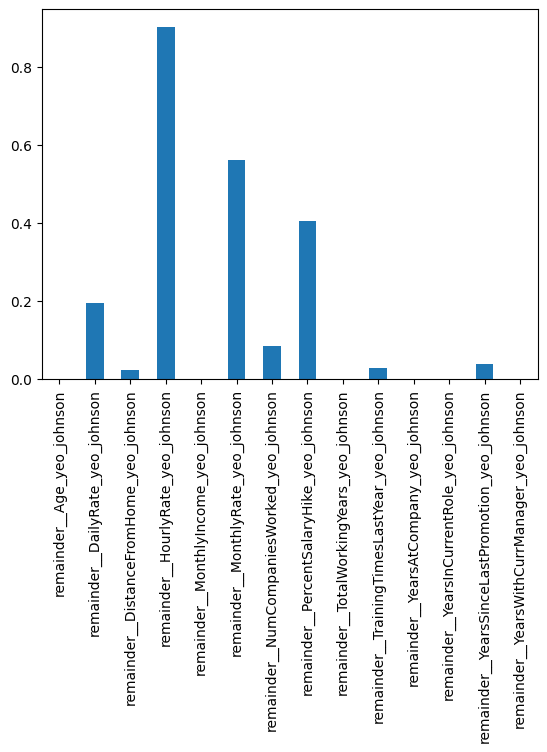

In [94]:
p_values_traindata.plot.bar()        #visualize the p value, so it's easy to remove the column

p value of DailyRate_yeo_johnson,remainder__DistanceFromHome_yeo_johnson ,       remainder__HourlyRate_yeo_johnson, remainder__MonthlyRate_yeo_johnson,remainder__NumCompaniesWorked_yeo_johnson,remainder__PercentSalaryHike_yeo_johnson, remainder__TrainingTimesLastYear_yeo_johnson and remainder__YearsSinceLastPromotion_yeo_johnson columns were greater than 0.05. So removing those column from both train and test data

In [95]:
x_train.drop(["remainder__DailyRate_yeo_johnson", 'remainder__DistanceFromHome_yeo_johnson' ,'remainder__HourlyRate_yeo_johnson','remainder__MonthlyRate_yeo_johnson','remainder__NumCompaniesWorked_yeo_johnson','remainder__PercentSalaryHike_yeo_johnson', 'remainder__TrainingTimesLastYear_yeo_johnson', 'remainder__YearsSinceLastPromotion_yeo_johnson'], axis=1, inplace=True)
test_data1.drop(["remainder__DailyRate_yeo_johnson", 'remainder__DistanceFromHome_yeo_johnson' ,'remainder__HourlyRate_yeo_johnson','remainder__MonthlyRate_yeo_johnson','remainder__NumCompaniesWorked_yeo_johnson','remainder__PercentSalaryHike_yeo_johnson', 'remainder__TrainingTimesLastYear_yeo_johnson', 'remainder__YearsSinceLastPromotion_yeo_johnson'], axis=1, inplace=True)

---chi2 test in Categorical column

In [96]:
x_train.columns

Index(['tnf1__BusinessTravel', 'tnf2__MaritalStatus',
       'tnf3__Department_Research & Development', 'tnf3__Department_Sales',
       'tnf3__EducationField_Life Sciences', 'tnf3__EducationField_Marketing',
       'tnf3__EducationField_Medical', 'tnf3__EducationField_Other',
       'tnf3__EducationField_Technical Degree', 'tnf3__Gender_Male',
       'tnf3__JobRole_Human Resources', 'tnf3__JobRole_Laboratory Technician',
       'tnf3__JobRole_Manager', 'tnf3__JobRole_Manufacturing Director',
       'tnf3__JobRole_Research Director', 'tnf3__JobRole_Research Scientist',
       'tnf3__JobRole_Sales Executive', 'tnf3__JobRole_Sales Representative',
       'tnf3__OverTime_Yes', 'remainder__Education',
       'remainder__EnvironmentSatisfaction', 'remainder__JobInvolvement',
       'remainder__JobLevel', 'remainder__JobSatisfaction',
       'remainder__RelationshipSatisfaction', 'remainder__StockOptionLevel',
       'remainder__WorkLifeBalance', 'remainder__Age_yeo_johnson',
       'remaind

In [97]:
cat1= x_train.drop(['remainder__Age_yeo_johnson','remainder__MonthlyIncome_yeo_johnson','remainder__TotalWorkingYears_yeo_johnson',
       'remainder__YearsAtCompany_yeo_johnson','remainder__YearsInCurrentRole_yeo_johnson','remainder__YearsWithCurrManager_yeo_johnson'],axis=1)


In [98]:
from scipy.stats import chi2_contingency
chi_statistic=[]
p_val=[]
vars_rm=[]

for i in cat1.columns:
    observed=pd.crosstab(index=y_train, columns=cat1[i])
    stat, p, dof, expected=chi2_contingency(observed)
    chi_statistic.append(stat)
    p_val.append(p)
    if p >= 0.05:
        print("Attrition and {} are independent (p-value = {:.2f}).\n".format(i,p))
        vars_rm.append(i)

Attrition and tnf3__EducationField_Life Sciences are independent (p-value = 0.26).

Attrition and tnf3__EducationField_Marketing are independent (p-value = 0.15).

Attrition and tnf3__EducationField_Medical are independent (p-value = 0.20).

Attrition and tnf3__EducationField_Other are independent (p-value = 0.97).

Attrition and tnf3__Gender_Male are independent (p-value = 0.23).

Attrition and tnf3__JobRole_Human Resources are independent (p-value = 0.31).

Attrition and tnf3__JobRole_Research Scientist are independent (p-value = 0.74).

Attrition and tnf3__JobRole_Sales Executive are independent (p-value = 0.74).

Attrition and remainder__Education are independent (p-value = 0.46).

Attrition and remainder__RelationshipSatisfaction are independent (p-value = 0.77).



In [99]:
x_train.drop(['tnf3__EducationField_Life Sciences', 'tnf3__EducationField_Marketing', 'tnf3__EducationField_Medical',
              'tnf3__EducationField_Other','tnf3__Gender_Male','tnf3__JobRole_Human Resources','tnf3__JobRole_Research Scientist',
              'tnf3__JobRole_Sales Executive','remainder__Education','remainder__RelationshipSatisfaction'], axis=1, inplace=True)

In [100]:
test_data1.drop(['tnf3__EducationField_Life Sciences', 'tnf3__EducationField_Marketing', 'tnf3__EducationField_Medical',
              'tnf3__EducationField_Other','tnf3__Gender_Male','tnf3__JobRole_Human Resources','tnf3__JobRole_Research Scientist',
              'tnf3__JobRole_Sales Executive','remainder__Education','remainder__RelationshipSatisfaction'], axis=1, inplace=True)

Based on the chi square test results Variables that are independent of attrition, like EducationField_Life Sciences, EducationField_Marketing, EducationField_Medical,EducationField_Other,Gender_Male,JobRole_HumanResources,JobRole_Research Scientist, JobRole_Sales Executive,remainder__Education and remainder__RelationshipSatisfaction will be removed from the train and test data.

**Balance the data**

In [101]:
y_train.value_counts()                 #checking number of 0 and 1 in train data

0    978
1    198
Name: Attrition_new, dtype: int64

In [102]:
x_testfinal= test_data1.drop(["Attrition_new"], axis=1)
y_testfinal=test_data1['Attrition_new']

In [103]:
#importing library
from imblearn.over_sampling import SMOTE#(Synthetic minority oversampling technique)
sm = SMOTE(random_state=2)
X_train1 , y_train1 = sm.fit_resample(x_train, y_train)
sum(y_train1==1)   ,sum(y_train1==0)

(978, 978)

**Model Development**

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [136]:
#Random Forest Algorithm

def random_forest(X_train1, y_train1, x_test_final, y_test):

    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train1,y_train1)
    y_train_pred1 = rf.predict(X_train1)

    print("\nAccuracy For Train Data")
    print(f'\nTraining accuracy= {accuracy_score(y_train1,y_train_pred1)}')

    print("\nConfusion Matrix For Train Data")
    print(confusion_matrix(y_train1,y_train_pred1))
    print('Accuracy:', accuracy_score(y_train1, y_train_pred1))
    print('Precision:', precision_score(y_train1, y_train_pred1))
    print('Recall:', recall_score(y_train1, y_train_pred1))
    print('F1-score:', f1_score(y_train1, y_train_pred1))


    y_test_pred = rf.predict(x_test_final)

    print('\nConfusion matrix\n', confusion_matrix(y_testfinal, y_test_pred))
    print('Accuracy:', accuracy_score(y_testfinal, y_test_pred))
    print('Precision:', precision_score(y_testfinal, y_test_pred))
    print('Recall:', recall_score(y_testfinal, y_test_pred))
    print('F1-score:', f1_score(y_testfinal, y_test_pred))

In [137]:
random_forest(X_train1, y_train1, x_testfinal, y_testfinal)  #calling the fuction


Accuracy For Train Data

Training accuracy= 1.0

Confusion Matrix For Train Data
[[978   0]
 [  0 978]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Confusion matrix
 [[249   6]
 [ 31   8]]
Accuracy: 0.8741496598639455
Precision: 0.5714285714285714
Recall: 0.20512820512820512
F1-score: 0.3018867924528302


**Tune Parameter**

In [107]:
# Parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
grid = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)],
        'max_features': [None, 'sqrt'],
        'max_depth': [None, 5, 7, 14, 21],
        'min_samples_split': [2, 5, 8],
        'min_samples_leaf': [3, 4, 5],
        'bootstrap': [True, False]}

rf=RandomForestClassifier(random_state=92)
rf_cv=RandomizedSearchCV(estimator=rf, param_distributions=grid, scoring='roc_auc',
                         n_iter=100, cv=5, random_state=92, n_jobs=-1)
rf_cv.fit(X_train1, y_train1)
print("Grid Search CV Best AUC = {:.3f}\nBest Params: {}".format(rf_cv.best_score_, rf_cv.best_estimator_))


Grid Search CV Best AUC = 0.986
Best Params: RandomForestClassifier(bootstrap=False, min_samples_leaf=3, min_samples_split=5,
                       random_state=92)


In [122]:
rf_cv.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [123]:
rf_cv.best_estimator_

RandomForestClassifier(bootstrap=False, min_samples_leaf=3, min_samples_split=5,
                       random_state=92)

In [128]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score
y_train_pred = cross_val_predict(rf_cv.best_estimator_, X_train1, y_train1, cv=5)
print('Confusion matrix\n', confusion_matrix(y_train1, y_train_pred))
print('Accuracy:', accuracy_score(y_train1, y_train_pred))
print('Precision:', precision_score(y_train1, y_train_pred))
print('Recall:', recall_score(y_train1, y_train_pred))
print('F1-score:', f1_score(y_train1, y_train_pred))

Confusion matrix
 [[927  51]
 [ 88 890]]
Accuracy: 0.9289366053169734
Precision: 0.9458023379383634
Recall: 0.9100204498977505
F1-score: 0.9275664408546118


**Model Evaluation on Test Data**

In [129]:
final_model = rf_cv.best_estimator_

y_test_pred = final_model.predict(x_testfinal)
print('Confusion matrix\n', confusion_matrix(y_testfinal, y_test_pred))
print('Accuracy:', accuracy_score(y_testfinal, y_test_pred))
print('Precision:', precision_score(y_testfinal, y_test_pred))
print('Recall:', recall_score(y_testfinal, y_test_pred))
print('F1-score:', f1_score(y_testfinal, y_test_pred))

Confusion matrix
 [[247   8]
 [ 29  10]]
Accuracy: 0.8741496598639455
Precision: 0.5555555555555556
Recall: 0.2564102564102564
F1-score: 0.3508771929824561


**Testing the model**

In [168]:
x_testfinal.tail(5)

tnf1__BusinessTravel tnf2__MaritalStatus  \
567                  1.0                 0.0   
560                  1.0                 2.0   
945                  1.0                 1.0   
522                  1.0                 0.0   
651                  1.0                 1.0   

    tnf3__Department_Research & Development tnf3__Department_Sales  \
567                                     0.0                    1.0   
560                                     1.0                    0.0   
945                                     1.0                    0.0   
522                                     1.0                    0.0   
651                                     0.0                    1.0   

    tnf3__EducationField_Technical Degree tnf3__JobRole_Laboratory Technician  \
567                                   0.0                                 0.0   
560                                   0.0                                 0.0   
945                                   0.0                                 0.0   
522                                   0.0                                 0.0   
651                                   0.0                                 0.0   

    tnf3__JobRole_Manager tnf3__JobRole_Manufacturing Director  \
567                   0.0                                  0.0   
560                   0.0                                  1.0   
945                   0.0                                  0.0   
522                   0.0                                  0.0   
651                   0.0                                  0.0   

    tnf3__JobRole_Research Director tnf3__JobRole_Sales Representative  ...  \
567                             0.0                                0.0  ...   
560                             0.0                                0.0  ...   
945                             1.0                                0.0  ...   
522                             0.0                                0.0  ...   
651                             0.0                                0.0  ...   

    remainder__JobLevel remainder__JobSatisfaction  \
567                   2                          4   
560                   2                          1   
945                   4                          1   
522                   1                          4   
651                   2                          4   

    remainder__StockOptionLevel remainder__WorkLifeBalance  \
567                           0                          3   
560                           1                          3   
945                           0                          3   
522                           0                          3   
651                           1                          3   

    remainder__Age_yeo_johnson remainder__MonthlyIncome_yeo_johnson  \
567                     5.1068                             6.151132   
560                     5.1068                             6.054409   
945                   5.881612                             6.599198   
522                   5.271285                             6.010976   
651                   5.753014                              5.99593   

    remainder__TotalWorkingYears_yeo_johnson  \
567                                 2.763974   
560                                  3.02968   
945                                 5.984271   
522                                 2.145839   
651                                 3.274331   

    remainder__YearsAtCompany_yeo_johnson  \
567                               2.22447   
560                                   0.0   
945                              1.524037   
522                              0.726504   
651                              2.399542   

    remainder__YearsInCurrentRole_yeo_johnson  \
567                                  2.350302   
560                                       0.0   
945                                  1.294029   
522                                       0.0   
651  

In [152]:
x_testfinal.iloc[184]

tnf1__BusinessTravel                                1.0
tnf2__MaritalStatus                                 1.0
tnf3__Department_Research & Development             0.0
tnf3__Department_Sales                              1.0
tnf3__EducationField_Technical Degree               0.0
tnf3__JobRole_Laboratory Technician                 0.0
tnf3__JobRole_Manager                               0.0
tnf3__JobRole_Manufacturing Director                0.0
tnf3__JobRole_Research Director                     0.0
tnf3__JobRole_Sales Representative                  0.0
tnf3__OverTime_Yes                                  0.0
remainder__EnvironmentSatisfaction                    3
remainder__JobInvolvement                             3
remainder__JobLevel                                   3
remainder__JobSatisfaction                            2
remainder__StockOptionLevel                           2
remainder__WorkLifeBalance                            2
remainder__Age_yeo_johnson                     5

In [145]:
#final_model.predict(x_testfinal.iloc[184])
print(f'The employee has %{final_model.predict_proba([x_testfinal.iloc[184]])[0, 1]*100:.1f} chances of attrition.')


The employee has %10.7 chances of attrition.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [150]:
data.iloc[184]            #checking with data

Age                                             53
Attrition                                       No
BusinessTravel                       Travel_Rarely
DailyRate                                     1084
Department                  Research & Development
DistanceFromHome                                13
Education                                        2
EducationField                             Medical
EnvironmentSatisfaction                          4
Gender                                      Female
HourlyRate                                      57
JobInvolvement                                   4
JobLevel                                         2
JobRole                     Manufacturing Director
JobSatisfaction                                  1
MaritalStatus                             Divorced
MonthlyIncome                                 4450
MonthlyRate                                  26250
NumCompaniesWorked                               1
Over18                         

In [153]:
x_testfinal.iloc[220]

tnf1__BusinessTravel                                2.0
tnf2__MaritalStatus                                 1.0
tnf3__Department_Research & Development             1.0
tnf3__Department_Sales                              0.0
tnf3__EducationField_Technical Degree               0.0
tnf3__JobRole_Laboratory Technician                 1.0
tnf3__JobRole_Manager                               0.0
tnf3__JobRole_Manufacturing Director                0.0
tnf3__JobRole_Research Director                     0.0
tnf3__JobRole_Sales Representative                  0.0
tnf3__OverTime_Yes                                  0.0
remainder__EnvironmentSatisfaction                    2
remainder__JobInvolvement                             3
remainder__JobLevel                                   2
remainder__JobSatisfaction                            2
remainder__StockOptionLevel                           1
remainder__WorkLifeBalance                            4
remainder__Age_yeo_johnson                     5

In [157]:
print(f'The employee has %{final_model.predict_proba([x_testfinal.iloc[220]])[0, 1]*100:.1f} chances of attrition.')


The employee has %12.5 chances of attrition.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [162]:
data.iloc[184]['Attrition']            #checking with data

'No'

In [176]:
x_testfinal.iloc[84]

tnf1__BusinessTravel                                1.0
tnf2__MaritalStatus                                 1.0
tnf3__Department_Research & Development             0.0
tnf3__Department_Sales                              1.0
tnf3__EducationField_Technical Degree               0.0
tnf3__JobRole_Laboratory Technician                 0.0
tnf3__JobRole_Manager                               0.0
tnf3__JobRole_Manufacturing Director                0.0
tnf3__JobRole_Research Director                     0.0
tnf3__JobRole_Sales Representative                  0.0
tnf3__OverTime_Yes                                  0.0
remainder__EnvironmentSatisfaction                    4
remainder__JobInvolvement                             2
remainder__JobLevel                                   3
remainder__JobSatisfaction                            1
remainder__StockOptionLevel                           1
remainder__WorkLifeBalance                            1
remainder__Age_yeo_johnson                      

In [198]:
print(f'The employee has %{final_model.predict_proba([x_testfinal.iloc[140]])[0, 1]*100:.1f} chances of attrition.')


The employee has %65.2 chances of attrition.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [197]:
data.iloc[140]

Age                                             32
Attrition                                      Yes
BusinessTravel                       Travel_Rarely
DailyRate                                     1033
Department                  Research & Development
DistanceFromHome                                 9
Education                                        3
EducationField                             Medical
EnvironmentSatisfaction                          1
Gender                                      Female
HourlyRate                                      41
JobInvolvement                                   3
JobLevel                                         1
JobRole                      Laboratory Technician
JobSatisfaction                                  1
MaritalStatus                               Single
MonthlyIncome                                 4200
MonthlyRate                                  10224
NumCompaniesWorked                               7
Over18                         

**ROC AUC CURVE**

In [110]:
from sklearn.metrics import roc_auc_score,roc_curve
r = RandomForestClassifier(bootstrap=False, min_samples_leaf=3, min_samples_split=5,
                       random_state=92)
r.fit(X_train1 , y_train1)
random_pro = r.predict_proba(x_testfinal)[:,1]
fprRandom, tprRandom, threshold = roc_curve(y_testfinal, random_pro)

<ipython-input-111-016a27fd3c90>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


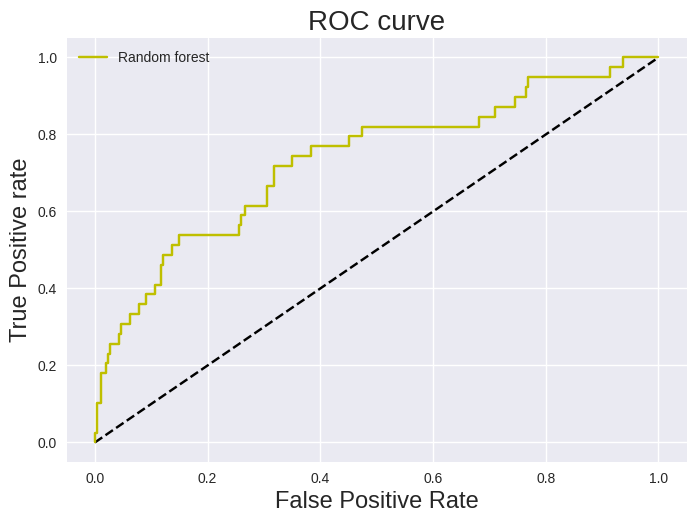

In [111]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.plot([0, 1], [0, 1], "k--")
# plot roc curves
plt.plot(fprRandom, tprRandom, color='y',label="Random forest")
plt.title('ROC curve',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=17)
plt.ylabel('True Positive rate',fontsize=17)

plt.legend(loc=0)
plt.show()

In [199]:
roc_auc_score(y_testfinal,random_pro)

0.7334338863750629

In [112]:
#finding the importance of each feature
for importance, name in sorted( zip(r.feature_importances_, X_train1.columns), reverse=True):
   print(name, importance)

tnf3__OverTime_Yes 0.1850055664982302
tnf2__MaritalStatus 0.09994076623376086
remainder__StockOptionLevel 0.0919786823006635
remainder__JobLevel 0.05987666569586781
remainder__MonthlyIncome_yeo_johnson 0.05238795982995204
remainder__YearsInCurrentRole_yeo_johnson 0.04880422824253913
remainder__YearsAtCompany_yeo_johnson 0.046732136383350574
remainder__JobSatisfaction 0.04407136881390955
remainder__Age_yeo_johnson 0.04257868169416477
remainder__TotalWorkingYears_yeo_johnson 0.03881365365714287
remainder__YearsWithCurrManager_yeo_johnson 0.036894569129025355
remainder__JobInvolvement 0.03466720321993063
tnf1__BusinessTravel 0.033992050630183776
remainder__EnvironmentSatisfaction 0.03372029521673793
tnf3__Department_Research & Development 0.03344429475562248
tnf3__Department_Sales 0.03259297641153122
remainder__WorkLifeBalance 0.031309551954951616
tnf3__JobRole_Laboratory Technician 0.022421364884550186
tnf3__EducationField_Technical Degree 0.012466085158431988
tnf3__JobRole_Manufacturing